<a href="https://colab.research.google.com/github/BrainConnection/Dynamical_Decoupling_Project/blob/main/With%20Purcell%20Filter%20(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting



In [ ]:
!pip install qutip
!pip install numpy
!pip install matplotlib
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 79.9 MB/s eta 0:00:00


In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.optimize import curve_fit

# CP CPMG UDD XY4 XY8 XY16 Sequence

In [ ]:
def Pulse_Timing_op1(T_srt, T_end, N, kappa):

  if 2*np.pi*0.0475 <kappa < 2*np.pi*0.0525:
    Tot_Seq = [[  7.95252834,   19.3121193,    30,   40], \
    [  17.58641498,   39.10664382,   60.89332269,   82.41364138], \
    [  28.42527759,   58.6092418,    91.3907877,   121.57486096], \
    [  44.83978102,   75.40872388,  124.5943459,   155.16307948], \
    [  63.7742821,    90.86660797,  159.19392938,  186.28649866], \
    [  80.20239063,  105.09314324,  194.9511213,   219.84199554], \
    [ 116.64181954,  139.95595252,  222.55757254,  245.87171989], \
    [  94.98179033,  117.06247698,  293.26957667,  315.35036567], \
    [ 101.37035816,  122.43265352,  323.98990557,  345.05217687], \
    [ 121.90814651,  142.10152031,  356.97992221,  377.17314639], \
    [ 201.58075504,  221.015168,    336.46962602,  355.90389045], \
    [ 129.45199465,  148.21324736,  439.8859347,   458.64745206], \
    [ 131.53997819,  149.69567383,  319.13957299,  337.29534247], \
    [ 272.14954101,  289.75341025,  432.7945287,   450.39846539], \
    [ 165.30470401,  182.40402388,  370.99858516,  388.0977086 ], \
    [ 200.33470847,  216.96654563,  579.36292,     595.99458579], \
    [ 202.56373135,  218.76199596,  616.28077822,  632.47915774], \
    [ 191.10762247,  206.90041143,  462.90716274,  478.70008975], \
    [ 172.99941484,  188.41159704,  816.18552924,  831.59781038], \
    [ 386.52757543,  401.58184565,  614.64422353,  629.6985514 ], \
    [ 236.24649001,  250.96172312,  775.7526202,   790.46800729], \
    [ 196.27169895,  210.66570908,  956.34736789,  970.74121962], \
    [ 244.41435283,  258.503446,    572.39644387,  586.48561878], \
    [ 468.46168684,  482.25962684,  757.21413444,  771.01189564], \
    [ 676.55951983,  690.07885479,  825.39367813,  838.91308511], \
    [ 300.41371338,  313.66719741,  944.17145679,  957.42512648], \
    [ 374.49278061,  387.49111683, 1047.58482342, 1060.58324652], \
    [ 294.93835882,  307.69116276, 1246.00335955, 1258.75632414], \
    [ 346.61600192,  359.13286997,  736.25472932,  748.77148375], \
    [ 591.9695934,   604.25919776,  933.77304734,  946.06257243], \
    [1111.55836211, 1123.62877456, 1395.36196844, 1407.43243611], \
    [ 419.10987749,  430.96817453,  791.84864753,  803.70683106], \
    [ 892.87703613,  904.52996193, 1085.47993957, 1097.13283044], \
    [ 134.36548107,  145.8198101,   840.03126708,  851.48575307], \
    [ 957.69786648,  968.95999394, 1156.46144552, 1167.72368651], \
    [ 382.41171394,  393.48743435, 1603.54910896, 1614.6247046 ], \
    [1230.45466456, 1241.34901665, 1692.0223838,  1702.91673351], \
    [1322.42007727, 1333.13779892, 1747.0941824,  1757.81185786], \
    [ 140.32512518,  150.8712731,   968.90609394,  979.45224691], \
    [1434.36649808, 1444.74584,    1851.24564916, 1861.62507475]]

  elif 2*np.pi*0.0425 <kappa < 2*np.pi*0.0475:
    [[   7.83279527,   19.27260066,   30,   40], \
    [  17.33195221,   39.04271775,   60.95714509,   82.66792232], \
    [  27.77174651,   58.70716372,   91.29265171,  122.22821939], \
    [  41.96761673,   76.58938572,  123.41123185,  158.03312763], \
    [  61.15812969,   92.01722509,  158.00665819,  188.86576396], \
    [  79.50269743,  107.62955722,  192.37284473,  220.49967935], \
    [ 107.8468917,   134.08124557,  227.70286428,  253.93734186], \
    [ 134.83525883,  159.61846026,  253.7863695,   278.56977162], \
    [ 113.71898094, 137.31988727,  332.06722067,   355.66797178], \
    [ 122.12873603,  144.72948619,  364.64147413,  387.24235424], \
    [ 133.46855036,  155.20176205,  404.94936034,  426.68271617], \
    [ 143.46269708,  164.42886806,  444.74284896,  465.70905386], \
    [ 129.32621149,  149.60353701,  321.28381402,  341.56117217], \
    [ 268.16469204,  287.81745294,  437.90677259,  457.55954709], \
    [ 198.3123264 ,  217.39408419,  551.2272122,   570.30916144], \
    [ 140.08334948,  158.63770115,  423.73384089,  442.28801215], \
    [ 180.25625671,  198.32195861,  428.38489131,  446.45070092], \
    [ 351.32515421,  368.93427112,  564.03188811,  581.64086402], \
    [ 247.40440956,  264.58602083,  715.90948406,  733.09093315], \
    [ 398.09559726,  414.87453333,  624.94442784,  641.72328922], \
    [ 259.25096509,  275.64931942,  793.87963569,  810.27805903], \
    [ 426.43080264,  442.46926342,  685.61429612,  701.65294487], \
    [ 273.42531832,  289.12123248,  857.27775614,  872.9737403 ], \
    [ 289.3717708,   304.74154325,  862.20151742,  877.57112834], \
    [ 230.81990052,  245.87862359, 1069.46102418, 1084.51961041], \
    [ 304.01242282,  318.77290328,  667.02031211,  681.78063185], \
    [ 742.95442498,  757.42894514,  882.66989113,  897.14451098], \
    [ 314.38455576,  328.58504135,  718.19348047,  732.39405055], \
    [ 240.22468486,  254.1613432,  1236.1963923,  1250.13315481], \
    [ 816.62131678,  830.30347378,  976.22114916,  989.90342668], \
    [ 327.41937098,  340.85622325,  760.06290281,  773.49980415], \
    [ 863.36533556,  876.56553878, 1058.27449734, 1071.47471354], \
    [ 893.08565227,  906.05711361, 1075.96501366, 1088.93640962], \
    [ 357.14559897,  369.89520285,  852.88744558,  865.63691872], \
    [ 712.26614415,  724.80052149, 1100.01763344, 1112.55209172], \
    [1250.54410003, 1262.87007453, 1666.32686102, 1678.65293664], \
    [ 735.52504739,  747.64894033, 1149.29574173, 1161.41983989], \
    [ 344.26402512,  356.19141126, 1650.98136583, 1662.90872537], \
    [ 473.82814691,  485.56405931, 1454.55657171, 1466.29251795], \
    [1417.32176676, 1428.87124845, 1843.09370005, 1854.64332734]]

  elif 2*np.pi*0.0375 <kappa < 2*np.pi*0.0425:
    [[   7.70360204,   19.23043421,   30,   40], \
    [  17.0475113,    38.96418242,   61.03590067,   82.95243078], \
    [  27.20896282,   58.71357094,   91.28625743,  122.79095077], \
    [  39.430764,     77.55970509,  122.44039193,  160.56940587], \
    [  57.60580654,   93.48723412,  156.51871056,  192.40008779], \
    [  76.49366155,  108.88103875,  191.14087495,  223.52800759], \
    [  94.37415257,  124.39522616,  225.67437457,  255.69533377], \
    [ 125.89631743,  154.1538525,   258.71571977,  286.97307663], \
    [ 153.91003969,  180.75744319,  287.06203877,  313.90962387], \
    [ 117.38833875,  143.0564409,   365.25138017,  390.91957228], \
    [ 132.32036064,  156.97326472,  401.99107448,  426.64420691], \
    [ 132.23257105,  155.99333234,  446.13492835,  469.8958326], \
    [ 157.66457315,  180.62861958,  477.74480117,  500.70897877], \
    [ 261.70493127,  283.94844103,  433.37739817,  455.62089101], \
    [ 198.78409895,  220.36987533,  563.47335912,  585.05929123], \
    [ 201.89878639,  222.88018023,  597.3249649,   618.30624028], \
    [ 214.88748111,  235.30807835,  619.49707872,  639.91756647], \
    [ 192.99739963,  212.89611844,  454.8017605,   474.70062797], \
    [ 205.99946184,  225.40944453,  479.91001795,  499.31983603], \
    [ 397.47442464,  416.42541131,  629.13824076,  648.08907299], \
    [ 182.55290806,  201.07005861,  887.2885872,   905.80556253], \
    [ 218.28914463,  236.39607113,  551.24327558,  569.35037931], \
    [ 286.08456352,  303.80199662,  852.68061684,  870.39794212], \
    [ 472.97026972,  490.31658829,  737.51201092,  754.85847275], \
    [ 281.46480021,  298.45766984,  593.99058267,  610.98341005], \
    [ 303.7448458,   320.39893393,  631.58799852,  648.2421625], \
    [ 530.4136231,   546.74359682,  840.38497979,  856.71473484], \
    [ 255.39732381,  271.41624328, 1190.66647782, 1206.68519566], \
    [ 313.23636679,  328.95572948,  729.18461873,  744.90401381], \
    [ 811.45856974,  826.88950259,  983.12787147,  998.55901957], \
    [ 345.27076293,  360.42427108,  784.37353296,  799.52690422], \
    [ 294.92509693,  309.81025546, 1374.68885284, 1389.57382531], \
    [ 321.08406281,  335.7095184,  1406.20849892, 1420.83401406], \
    [ 424.147726,    438.52213786,  836.84914401,  851.2236113], \
    [ 321.66824831,  335.79964488, 1500.40775062, 1514.53918238], \
    [ 317.09045936,  330.98604984, 1560.98100691, 1574.87662946], \
    [1005.91536132, 1019.58183059, 1209.6242817,  1223.29077104], \
    [ 398.45570367,  411.89962625,  954.19132633,  967.63540408], \
    [ 782.39204797,  795.61992044, 1236.26945755, 1249.4974976], \
    [ 357.20306246,  370.22066583, 1717.63137532, 1730.64882066]]

  elif 2*np.pi*0.0325 <kappa < 2*np.pi*0.0375:
    [[   7.56379775,   19.18454147,   30.81580265,   42.43623895], \
    [  16.72370156,   38.86828663,   61.13148511,   83.27613567], \
    [  26.65786002,   58.65239575,   91.34769663,  123.34222715], \
    [  37.71806595,   78.04254701,  121.95759963,  162.28209823], \
    [  53.0660413,    95.35817264,  154.64147516,  196.93360622], \
    [  72.4440124,   110.72033347,  189.30217927,  227.57812964], \
    [  91.1621584,   126.31349729,  223.73463944,  258.88571231], \
    [ 108.89290053,  141.79533665,  258.77949589,  291.68179972], \
    [ 140.25872205,  171.41025488,  293.30344779,  324.4551065], \
    [ 168.86579157,  198.57894525,  318.86041192,  348.573368], \
    [ 120.63372677,  149.12294144,  389.32475757,  417.81418062], \
    [ 149.14855917,  176.57133937,  442.24525929,  469.66805516], \
    [ 163.13533821,  189.61131423,  475.55556219,  502.03148118], \
    [ 171.46706766,  197.09156936,  504.35692775,  529.98136787], \
    [ 177.83923106,  202.68963781,  381.90040271,  406.75093964], \
    [ 218.67097264,  242.81149864,  594.24636329,  618.38663514], \
    [ 216.00928042,  239.49322221,  629.00734075,  652.49132555], \
    [ 347.92336109,  370.79761857,  553.82324847,  576.69761114], \
    [ 200.16326472,  222.46771565,  485.67172743,  507.9762147], \
    [ 217.18885734,  238.95840911,  495.8461267,   517.61579526], \
    [ 403.42149527,  424.68708438,  646.38079062,  667.64643488], \
    [ 232.10587993,  252.89511405,  548.00653216,  568.79569451], \
    [ 254.13100105,  274.46803552,  573.88842768,  594.22554002], \
    [ 468.03001256,  487.93731107,  750.00361542,  769.91108224], \
    [ 343.93063352,  363.42806627,  937.91822969,  957.41552971], \
    [ 288.28608428,  307.39200874,  643.70567279,  662.81165822], \
    [ 532.19418732,  550.92512579,  839.7404034,   858.4713223], \
    [ 555.83732493,  574.20861317,  875.49894409,  893.87035455], \
    [ 381.73739181,  399.76331294, 1110.54995747, 1128.57573139], \
    [ 365.30442745,  382.99747254,  741.35089047,  759.04378034], \
    [ 289.29062627,  306.66307049, 1317.99972396, 1335.37202012], \
    [ 284.60711217,  301.67030421, 1335.5613317,  1352.62447611], \
    [ 661.54644939,  678.31046582, 1017.22095434, 1033.98500866], \
    [ 320.3254542,   336.8001502,  1437.99300293, 1454.46761201], \
    [ 342.49751183,  358.69205559, 1506.66349848, 1522.85819181], \
    [ 497.98314684,  513.90611887, 1344.80119162, 1360.72425166], \
    [ 396.01362765,  411.67288125,  915.8158793,   931.4752976], \
    [ 766.82351966,  782.22683026, 1177.61606379, 1193.01926405], \
    [1061.75407701, 1076.90880026, 1272.28182837, 1287.4365456], \
    [1080.51893156, 1095.43159037, 1326.20940117, 1341.12192883]]


  if T_end < 75 :
    Seq_list = Tot_Seq[0]

  elif 75 < T_end < 125 :
    Seq_list = Tot_Seq[1]

  elif 125 < T_end < 175 :
    Seq_list = Tot_Seq[2]

  elif 175 < T_end < 225 :
    Seq_list = Tot_Seq[3]

  elif 225 < T_end < 275 :
    Seq_list = Tot_Seq[4]

  elif 275 < T_end < 325 :
    Seq_list = Tot_Seq[5]

  elif 325 < T_end < 375 :
    Seq_list = Tot_Seq[6]

  elif 375 < T_end < 425 :
    Seq_list = Tot_Seq[7]

  elif 425 < T_end < 475 :
    Seq_list = Tot_Seq[8]

  elif 475 < T_end < 525 :
    Seq_list = Tot_Seq[9]

  elif 525 < T_end < 575 :
    Seq_list = Tot_Seq[10]

  elif 575 < T_end < 625 :
    Seq_list = Tot_Seq[11]

  elif 625 < T_end < 675 :
    Seq_list = Tot_Seq[12]

  elif 675 < T_end < 725 :
    Seq_list = Tot_Seq[13]

  elif 725 < T_end < 775 :
    Seq_list = Tot_Seq[14]

  elif 775 < T_end < 825 :
    Seq_list = Tot_Seq[15]

  elif 825 < T_end < 875 :
    Seq_list = Tot_Seq[16]

  elif 875 < T_end < 925 :
    Seq_list = Tot_Seq[17]

  elif 925 < T_end < 975 :
    Seq_list = Tot_Seq[18]

  elif 975 < T_end < 1025 :
    Seq_list = Tot_Seq[19]

  elif 1025 < T_end < 1075 :
    Seq_list = Tot_Seq[20]

  elif 1075 < T_end < 1125 :
    Seq_list = Tot_Seq[21]

  elif 1125 < T_end < 1175 :
    Seq_list = Tot_Seq[22]

  elif 1175 < T_end < 1225 :
    Seq_list = Tot_Seq[23]

  elif 1225 < T_end < 1275 :
    Seq_list = Tot_Seq[24]

  elif 1275 < T_end < 1325 :
    Seq_list = Tot_Seq[25]

  elif 1325 < T_end < 1375 :
    Seq_list = Tot_Seq[26]

  elif 1375 < T_end < 1425 :
    Seq_list = Tot_Seq[27]

  elif 1425 < T_end < 1475 :
    Seq_list = Tot_Seq[28]

  elif 1475 < T_end < 1525 :
    Seq_list = Tot_Seq[29]

  elif 1525 < T_end < 1575 :
    Seq_list = Tot_Seq[30]

  elif 1575 < T_end < 1625 :
    Seq_list = Tot_Seq[31]

  elif 1625 < T_end < 1675 :
    Seq_list = Tot_Seq[32]

  elif 1675 < T_end < 1725 :
    Seq_list = Tot_Seq[33]

  elif 1725 < T_end < 1775 :
    Seq_list = Tot_Seq[34]

  elif 1775 < T_end < 1825 :
    Seq_list = Tot_Seq[35]

  elif 1825 < T_end < 1875 :
    Seq_list = Tot_Seq[36]

  elif 1875 < T_end < 1925 :
    Seq_list = Tot_Seq[37]

  elif 1925 < T_end < 1975 :
    Seq_list = Tot_Seq[38]

  elif 1975 < T_end < 2025 :
    Seq_list = Tot_Seq[39]


  Seq = np.array(Seq_list)

  return Seq

In [ ]:
# Modulate each pulse timing (Equivalent Spacing)
# pulse list
# skip pi/2 pulse at T_srt, T_end
# pi pulse at pulse time list

def Pulse_Timing(T_srt, T_end, N):

    T = T_end - T_srt
    Seq_list = []
    for i in range(N):
      Seq_list.append(T_srt + (2*i+1)*T/(2*N))

    Seq = np.array(Seq_list)

    return Seq


# Single Square Pulse Envolope

def Single_pulse_env(t, B, T_cent):

    return B * (t > T_cent-0.5*np.pi/B) * (t < T_cent+0.5*np.pi/B)


# Single Square Pulse (lab frame)

def Single_pulse(t, B, Omega_qd, T_cent, Phi_qd):

    return Single_pulse_env(t, B, T_cent) * np.cos(Omega_qd * t + Phi_qd)


# time-dependent coefficient for resonator drive

def Hrd_rotating_frame(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T_srt = args['T_srt_r'] # duration of the readout drive, in units of ns
    T_end = args['T_end_r'] # duration of the readout drive, in units of ns

    return A * (T_srt <= t) * (t <= T_end)


def Hrd_lab_frame(t, args):
    omega_rd = args['Omega_rd']
    return Hrd_rotating_frame(t, args) * np.cos(omega_rd * t)

## CP CPMG UDD Sequence

In [ ]:
# CP (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def CP_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    N = args['N_seq']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, N)
    pulse = 0

    for T_cent in Seq:
      pulse = pulse + Single_pulse(t, B, Omega_qd, T_cent, 0)

    return pulse

In [ ]:
# CPMG (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def CPMG_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    N = args['N_seq']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, N)
    pulse = 0

    for T_cent in Seq:
      pulse = pulse + Single_pulse(t, B, Omega_qd, T_cent, 0.5*np.pi)

    return pulse

## XY4 XY8 XY16 Sequence

In [ ]:
# XY4 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY4_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, 4)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 1.0*np.pi)

    return pulse

In [ ]:
# XY4 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY4_lab_frame_op1(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']
    kappa = args['kappa']

    # T_cent
    Seq = Pulse_Timing_op1(T_srt, T_end, 4, kappa)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 1.0*np.pi)

    return pulse

In [ ]:
# XY8 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY8_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, 8)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 0.5*np.pi)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[4], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[5], 1.0*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[6], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[7], 1.0*np.pi)

    return pulse

In [ ]:
# XY16 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY16_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, 16)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 0.5*np.pi)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[4], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[5], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[6], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[7], 0)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[8], np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[9], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[10], np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[11], 1.5*np.pi)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[12], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[13], np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[14], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[15], np.pi)

    return pulse

# Effective Linewidth & Photon Number & Ring-up Oscillation Frequency Simulation

A = 0.0005 GHz

In [ ]:
rkappa_simulation = []
rphoton_simulation = []
roscillation_simulation = []

## $G=2\pi 10MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.010        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 50MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.050  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032184, 0.01125657, 0.04923754])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 60MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.060  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032227, 0.010878  , 0.04158306])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 70MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.070  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032254, 0.01062424, 0.03581467])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 80MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.080  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032272, 0.01045076, 0.03139675])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 90MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.090  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032286, 0.01032854, 0.02793192])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 100MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.100  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032296, 0.01023976, 0.02515079])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## $G=2\pi 20MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.020        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 100MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.100  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00022637, 0.01153447, 0.10946869])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 120MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.120  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00024692, 0.01099099, 0.09004664])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 140MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.140  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00026232, 0.01067029, 0.07608086])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 160MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.160  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00027393, 0.01046561, 0.0658197 ])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 180MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.180  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00028277, 0.01032743, 0.058017  ])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 200MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.200  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00028962, 0.01022995, 0.05189407])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## $G=2\pi 30MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.030        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 150MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.150  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.51164289e-04, 1.16907328e-02, 1.66863048e-01])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 180MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.180  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00017726, 0.01101458, 0.13692146])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 210MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.210  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00019953, 0.01066507, 0.11540518])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 240MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.240  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00021813, 0.0104535 , 0.0996466 ])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 270MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.270  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00023353, 0.01031352, 0.08770398])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00024625, 0.01021554, 0.07836079])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## $G=2\pi 40MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.040        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 200MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.200  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.03180680e-04, 1.19115007e-02, 2.23191704e-01])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 240MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.240  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.27074328e-04, 1.10368269e-02, 1.83266545e-01])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 280MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.280  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.49450423e-04, 1.06444880e-02, 1.54505671e-01])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 320MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.320  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00016974, 0.01042551, 0.13340935])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 360MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.360  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00018776, 0.01028631, 0.11740921])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00020357, 0.01019066, 0.10488787])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## $G=2\pi 50MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([7.33267588e-05, 1.21785516e-02, 2.79615618e-01])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([9.32357383e-05, 1.10480768e-02, 2.29789103e-01])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.13084147e-04, 1.05995046e-02, 1.93843464e-01])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.32183288e-04, 1.03728143e-02, 1.67435173e-01])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.0001501 , 0.01023745, 0.14738054])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [ ]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00016662, 0.01014762, 0.13167345])

In [ ]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## Comparison btw simulation & theory

In [ ]:
rkappa_simulation

[0.04923754279033691,
 0.041583062538215795,
 0.035814672270080186,
 0.03139675094200489,
 0.027931920781119543,
 0.025150788224950257,
 0.10946869476482149,
 0.0900466388347687,
 0.076080860599921,
 0.06581970365623946,
 0.058016998355638824,
 0.05189406996775679,
 0.1668630484402444,
 0.13692145879312892,
 0.11540517973905985,
 0.099646600250414,
 0.08770398072520952,
 0.07836078720717052,
 0.22319170415481224,
 0.1832665453649386,
 0.15450567143329377,
 0.133409353331026,
 0.1174092065321609,
 0.10488786846167904,
 0.2796156184458503,
 0.2297891027877527,
 0.19384346406886288,
 0.16743517287832077,
 0.14738053986157504,
 0.1316734544309056]

In [ ]:
rphoton_simulation

[0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268]

In [ ]:
roscillation_simulation

[0.01125657465815319,
 0.010877999728563284,
 0.010624240169633552,
 0.010450762688776784,
 0.010328535913545767,
 0.010239762733728569,
 0.01153446513238578,
 0.010990987076565178,
 0.010670287075410474,
 0.01046561020815467,
 0.010327428373482165,
 0.010229949744862063,
 0.011690732781793268,
 0.011014582017475181,
 0.01066507365849155,
 0.010453495661126223,
 0.01031352334503507,
 0.010215536896557678,
 0.011911500704559855,
 0.011036826881900939,
 0.010644487966029726,
 0.010425508049551866,
 0.010286305148762716,
 0.010190658070429398,
 0.012178551609085219,
 0.011048076794453562,
 0.010599504646035337,
 0.010372814267771728,
 0.010237448185877105,
 0.010147624912670832]

rkappa_simulation

[0.04923754279033691,
 0.041583062538215795,
 0.035814672270080186,
 0.03139675094200489,
 0.027931920781119543,
 0.025150788224950257,
 0.10946869476482149,
 0.0900466388347687,
 0.076080860599921,
 0.06581970365623946,
 0.058016998355638824,
 0.05189406996775679,
 0.1668630484402444,
 0.13692145879312892,
 0.11540517973905985,
 0.099646600250414,
 0.08770398072520952,
 0.07836078720717052,
 0.22319170415481224,
 0.1832665453649386,
 0.15450567143329377,
 0.133409353331026,
 0.1174092065321609,
 0.10488786846167904,
 0.2796156184458503,
 0.2297891027877527,
 0.19384346406886288,
 0.16743517287832077,
 0.14738053986157504,
 0.1316734544309056]

rphoton_simulation

[0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268]

roscillation_simulation

[0.01125657465815319,
 0.010877999728563284,
 0.010624240169633552,
 0.010450762688776784,
 0.010328535913545767,
 0.010239762733728569,
 0.01153446513238578,
 0.010990987076565178,
 0.010670287075410474,
 0.01046561020815467,
 0.010327428373482165,
 0.010229949744862063,
 0.011690732781793268,
 0.011014582017475181,
 0.01066507365849155,
 0.010453495661126223,
 0.01031352334503507,
 0.010215536896557678,
 0.011911500704559855,
 0.011036826881900939,
 0.010644487966029726,
 0.010425508049551866,
 0.010286305148762716,
 0.010190658070429398,
 0.012178551609085219,
 0.011048076794453562,
 0.010599504646035337,
 0.010372814267771728,
 0.010237448185877105,
 0.010147624912670832]

In [ ]:
rkappa_simulation = [0.04923754279033691,
 0.041583062538215795,
 0.035814672270080186,
 0.03139675094200489,
 0.027931920781119543,
 0.025150788224950257,
 0.10946869476482149,
 0.0900466388347687,
 0.076080860599921,
 0.06581970365623946,
 0.058016998355638824,
 0.05189406996775679,
 0.1668630484402444,
 0.13692145879312892,
 0.11540517973905985,
 0.099646600250414,
 0.08770398072520952,
 0.07836078720717052,
 0.22319170415481224,
 0.1832665453649386,
 0.15450567143329377,
 0.133409353331026,
 0.1174092065321609,
 0.10488786846167904,
 0.2796156184458503,
 0.2297891027877527,
 0.19384346406886288,
 0.16743517287832077,
 0.14738053986157504,
 0.1316734544309056]


rphoton_simulation = [0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268]


roscillation_simulation = [0.01125657465815319,
 0.010877999728563284,
 0.010624240169633552,
 0.010450762688776784,
 0.010328535913545767,
 0.010239762733728569,
 0.01153446513238578,
 0.010990987076565178,
 0.010670287075410474,
 0.01046561020815467,
 0.010327428373482165,
 0.010229949744862063,
 0.011690732781793268,
 0.011014582017475181,
 0.01066507365849155,
 0.010453495661126223,
 0.01031352334503507,
 0.010215536896557678,
 0.011911500704559855,
 0.011036826881900939,
 0.010644487966029726,
 0.010425508049551866,
 0.010286305148762716,
 0.010190658070429398,
 0.012178551609085219,
 0.011048076794453562,
 0.010599504646035337,
 0.010372814267771728,
 0.010237448185877105,
 0.010147624912670832]


rkappa_simulation = np.array(rkappa_simulation)
rphoton_simulation = np.array(rphoton_simulation)
roscillation_simulation = np.array(roscillation_simulation)

rphoton_standard = np.array([0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268])

In [ ]:
rkappa_simulation/(2*np.pi)

array([0.0078364 , 0.00661815, 0.00570008, 0.00499695, 0.0044455 ,
       0.00400287, 0.01742248, 0.01433137, 0.01210865, 0.01047553,
       0.00923369, 0.0082592 , 0.02655708, 0.02179173, 0.0183673 ,
       0.01585925, 0.01395852, 0.01247151, 0.03552206, 0.02916778,
       0.02459034, 0.02123276, 0.01868626, 0.01669342, 0.04450221,
       0.03657207, 0.03085115, 0.02664814, 0.02345634, 0.02095648])

Text(0, 0.5, 'Effective Readout Linewidth (MHz)')

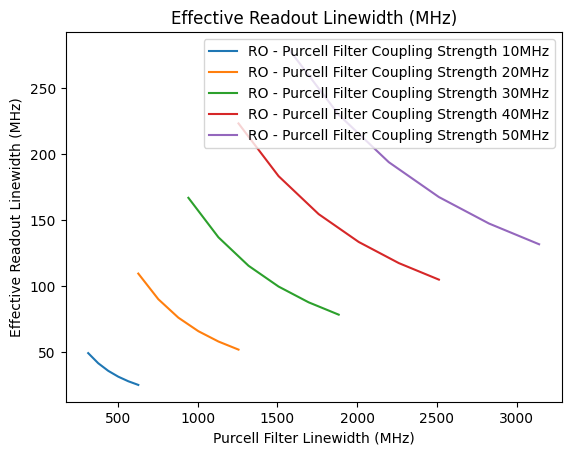

In [ ]:
# Plot Results

kappa_list1 = np.array([2*np.pi*10*(i+5) for i in range(6)])
kappa_list2 = np.array([2*np.pi*20*(i+5) for i in range(6)])
kappa_list3 = np.array([2*np.pi*30*(i+5) for i in range(6)])
kappa_list4 = np.array([2*np.pi*40*(i+5) for i in range(6)])
kappa_list5 = np.array([2*np.pi*50*(i+5) for i in range(6)])


plt.plot(kappa_list1, 1000*rkappa_simulation[0:6], label="RO - Purcell Filter Coupling Strength 10MHz")
plt.plot(kappa_list2, 1000*rkappa_simulation[6:12], label="RO - Purcell Filter Coupling Strength 20MHz")
plt.plot(kappa_list3, 1000*rkappa_simulation[12:18], label="RO - Purcell Filter Coupling Strength 30MHz")
plt.plot(kappa_list4, 1000*rkappa_simulation[18:24], label="RO - Purcell Filter Coupling Strength 40MHz")
plt.plot(kappa_list5, 1000*rkappa_simulation[24:30], label="RO - Purcell Filter Coupling Strength 50MHz")

plt.legend()
plt.title('Effective Readout Linewidth (MHz)')
plt.xlabel('Purcell Filter Linewidth (MHz)')
plt.ylabel('Effective Readout Linewidth (MHz)')

Text(0, 0.5, 'Readout Resonator Photon Number')

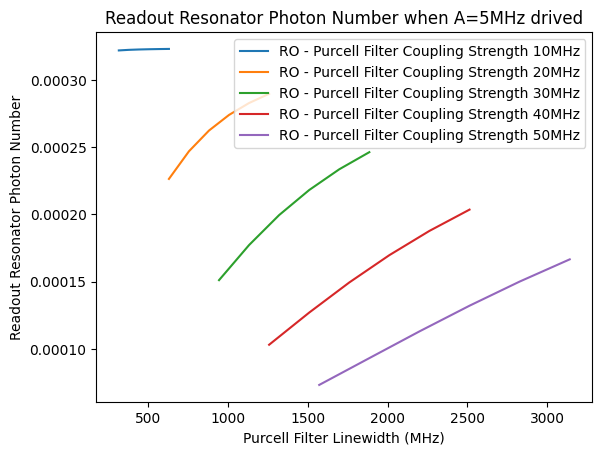

In [ ]:
# Plot Results

kappa_list1 = np.array([2*np.pi*10*(i+5) for i in range(6)])
kappa_list2 = np.array([2*np.pi*20*(i+5) for i in range(6)])
kappa_list3 = np.array([2*np.pi*30*(i+5) for i in range(6)])
kappa_list4 = np.array([2*np.pi*40*(i+5) for i in range(6)])
kappa_list5 = np.array([2*np.pi*50*(i+5) for i in range(6)])


plt.plot(kappa_list1, rphoton_simulation[0:6], label="RO - Purcell Filter Coupling Strength 10MHz")
plt.plot(kappa_list2, rphoton_simulation[6:12], label="RO - Purcell Filter Coupling Strength 20MHz")
plt.plot(kappa_list3, rphoton_simulation[12:18], label="RO - Purcell Filter Coupling Strength 30MHz")
plt.plot(kappa_list4, rphoton_simulation[18:24], label="RO - Purcell Filter Coupling Strength 40MHz")
plt.plot(kappa_list5, rphoton_simulation[24:30], label="RO - Purcell Filter Coupling Strength 50MHz")

plt.legend()
plt.title('Readout Resonator Photon Number when A=5MHz drived')
plt.xlabel('Purcell Filter Linewidth (MHz)')
plt.ylabel('Readout Resonator Photon Number')

# Maximum Photon Number (fixed steady state photon number 0.01) $\pi$ pulse $G=2\pi 50MHz$

$n = 0.01$

In [ ]:
rkappa_simulation = np.array([0.04923754279033691,
 0.041583062538215795,
 0.035814672270080186,
 0.03139675094200489,
 0.027931920781119543,
 0.025150788224950257,
 0.10946869476482149,
 0.0900466388347687,
 0.076080860599921,
 0.06581970365623946,
 0.058016998355638824,
 0.05189406996775679,
 0.1668630484402444,
 0.13692145879312892,
 0.11540517973905985,
 0.099646600250414,
 0.08770398072520952,
 0.07836078720717052,
 0.22319170415481224,
 0.1832665453649386,
 0.15450567143329377,
 0.133409353331026,
 0.1174092065321609,
 0.10488786846167904,
 0.2796156184458503,
 0.2297891027877527,
 0.19384346406886288,
 0.16743517287832077,
 0.14738053986157504,
 0.1316734544309056])

In [ ]:
rphoton_standard = np.array([0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268])

In [ ]:
maxphoton_simulation = []

## $B=2\pi 10MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

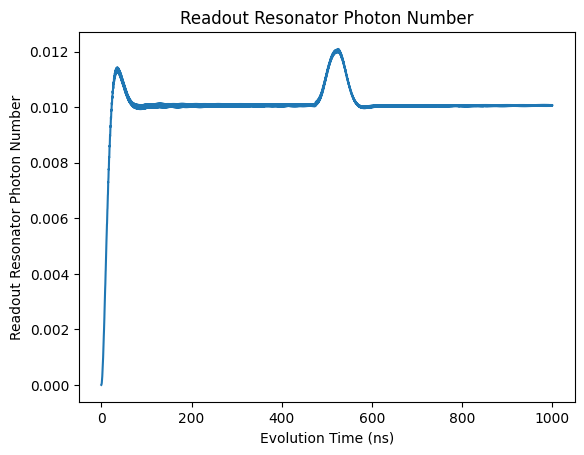

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

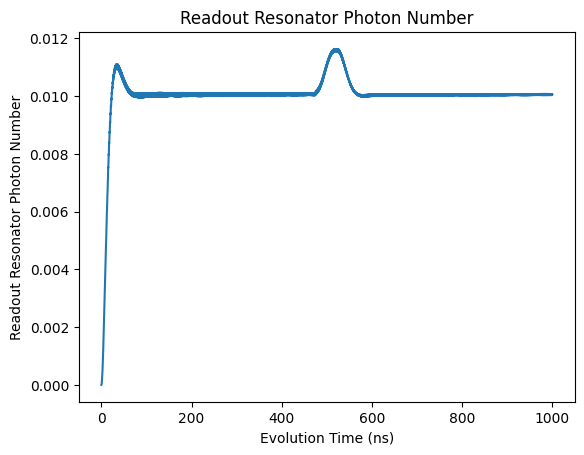

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

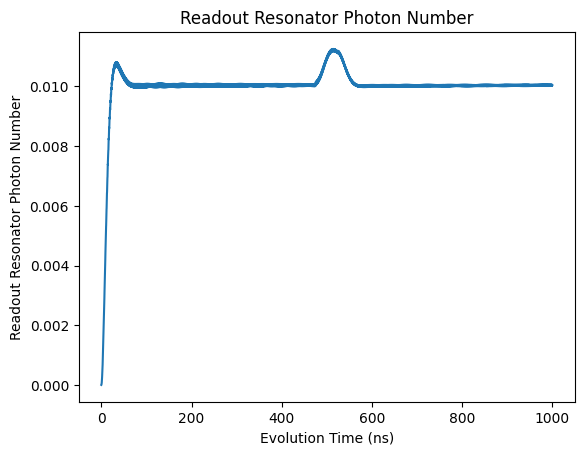

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

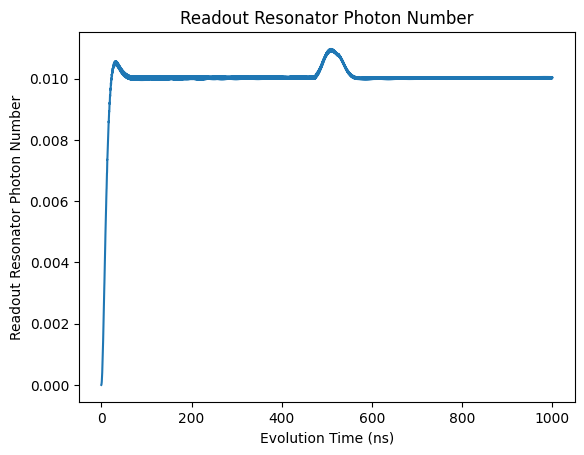

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

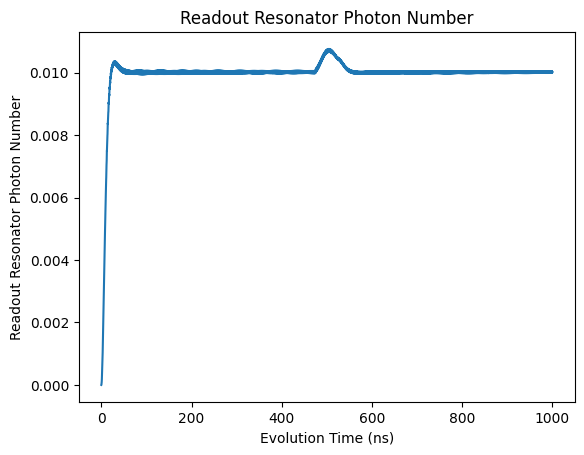

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

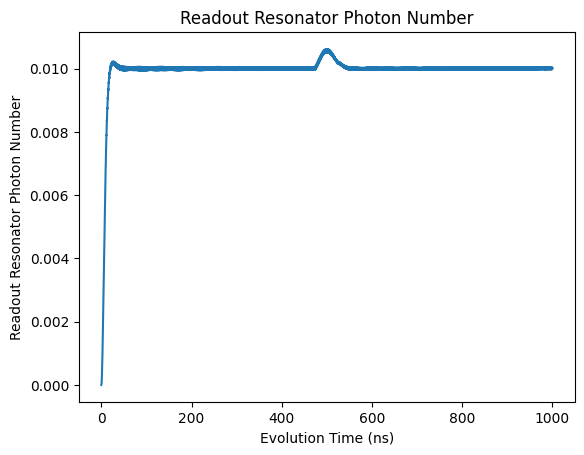

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## $B=2\pi 20MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.02 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

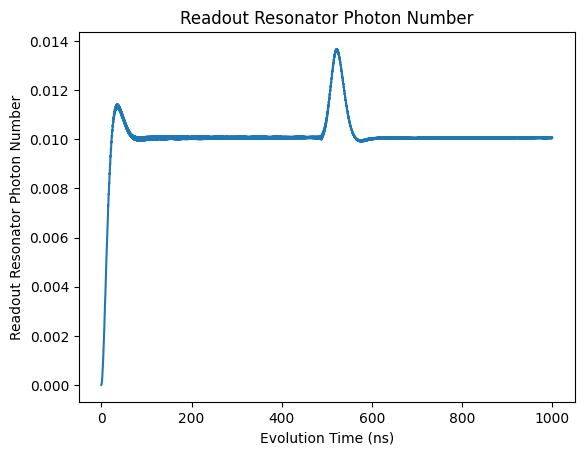

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

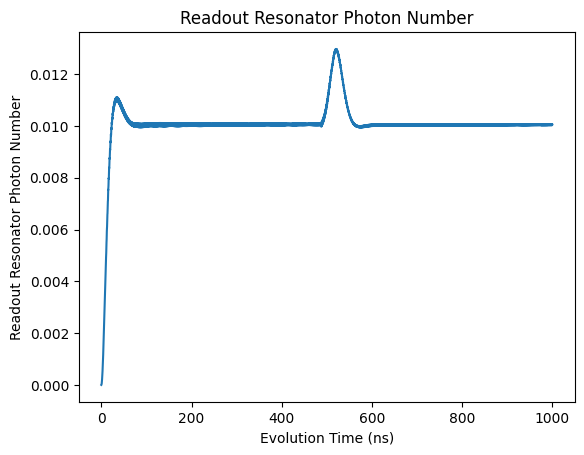

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

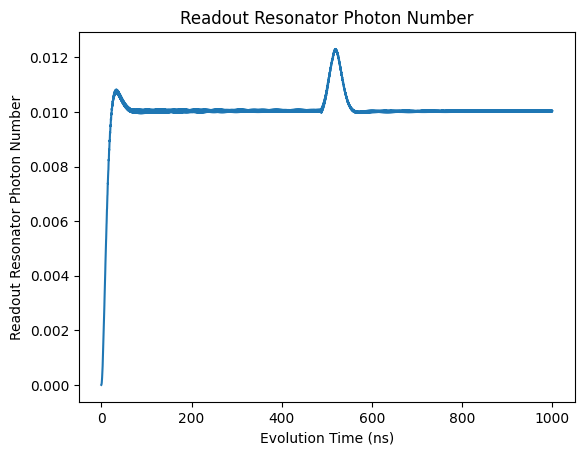

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

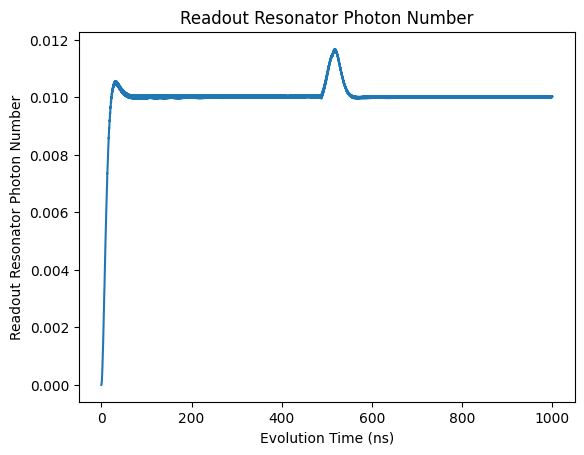

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

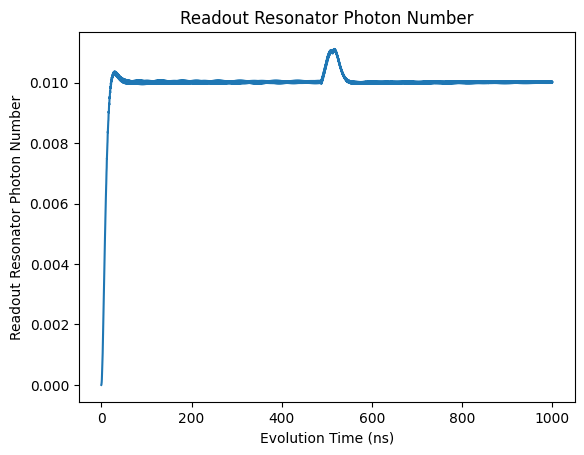

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

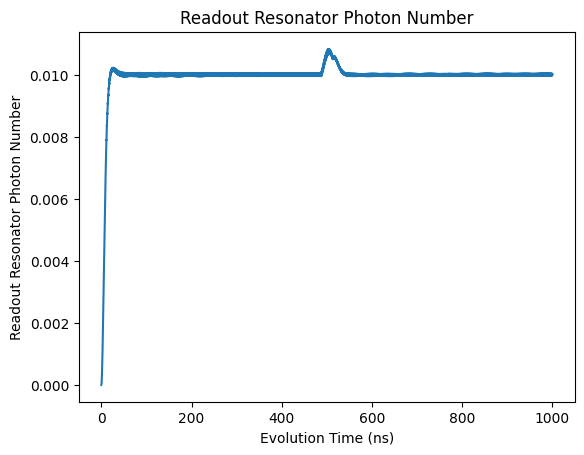

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## $B=2\pi 30MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.03 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

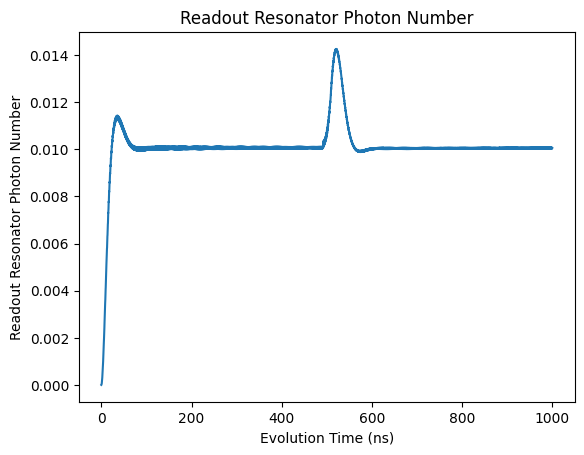

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

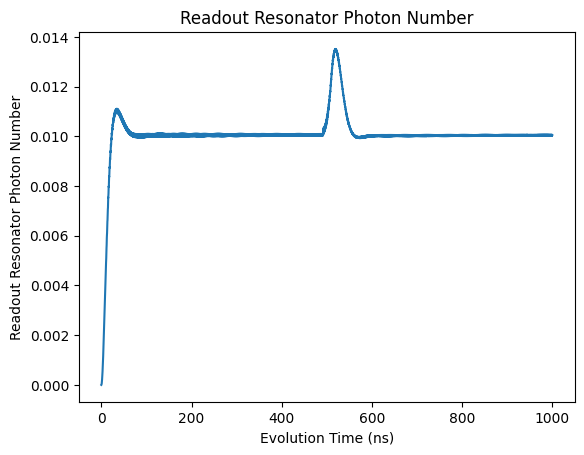

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

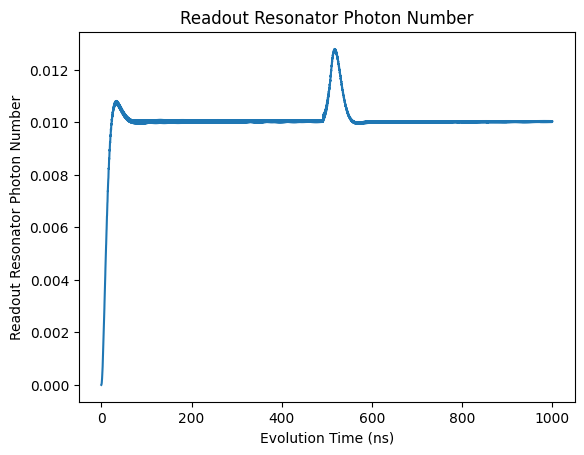

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

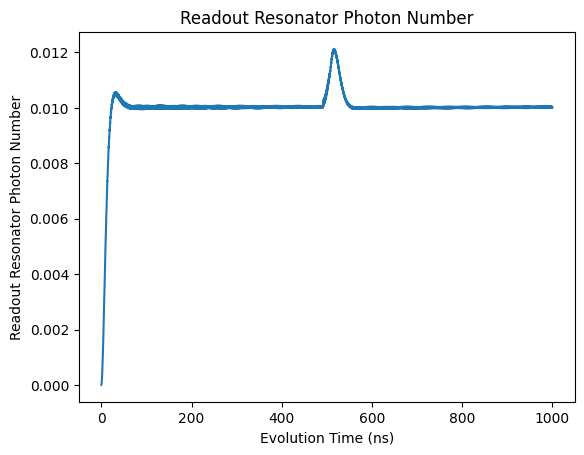

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

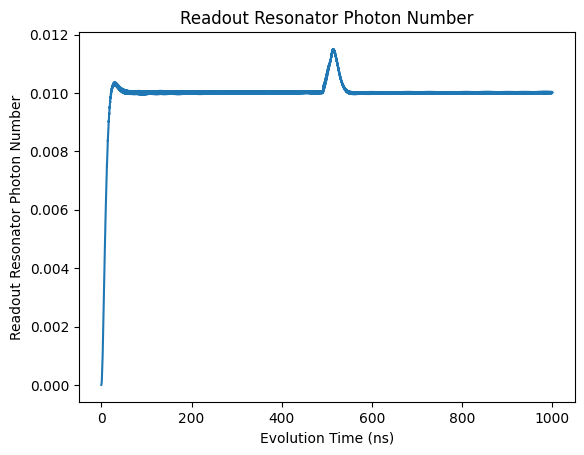

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

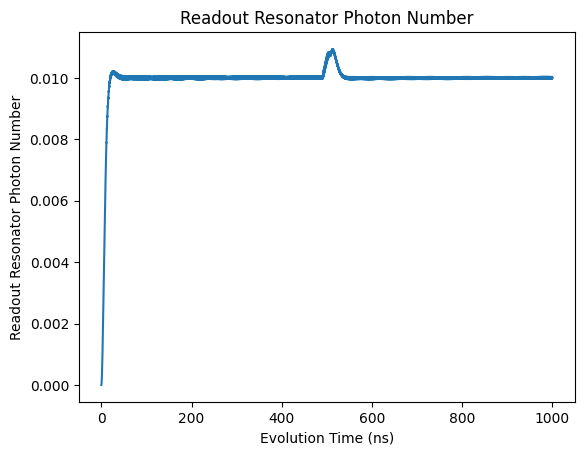

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## $B=2\pi 40MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.04 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

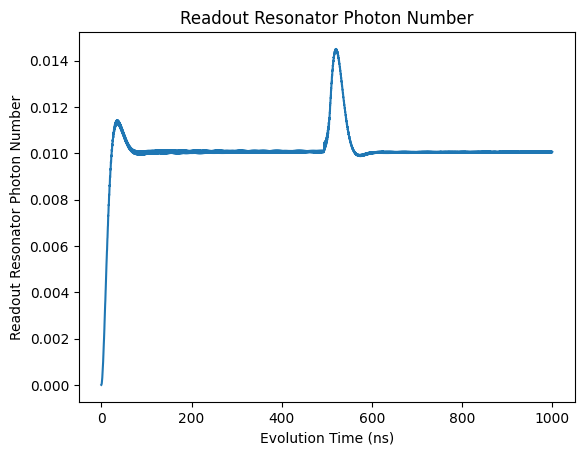

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

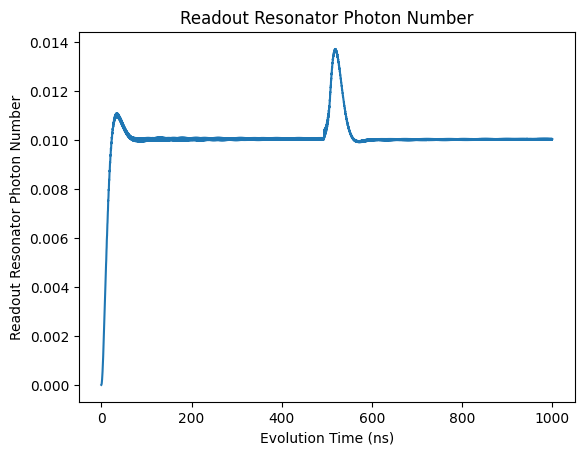

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

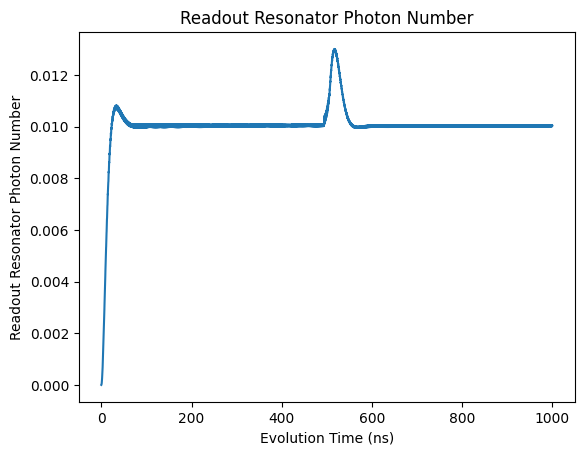

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

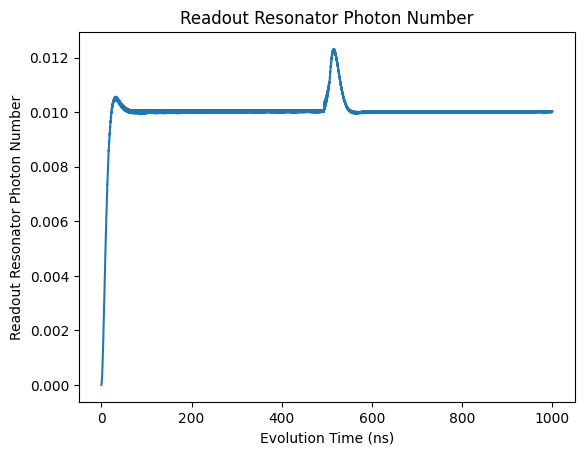

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

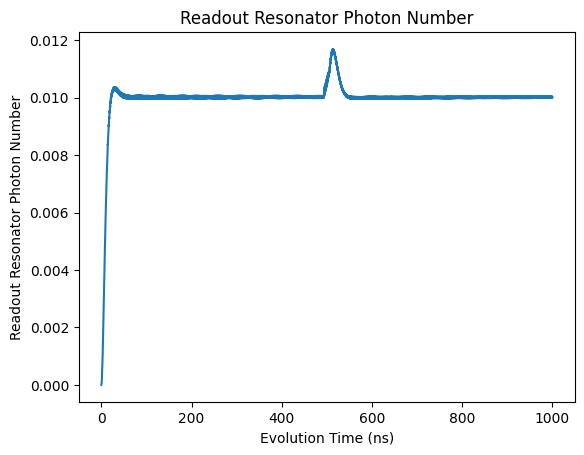

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

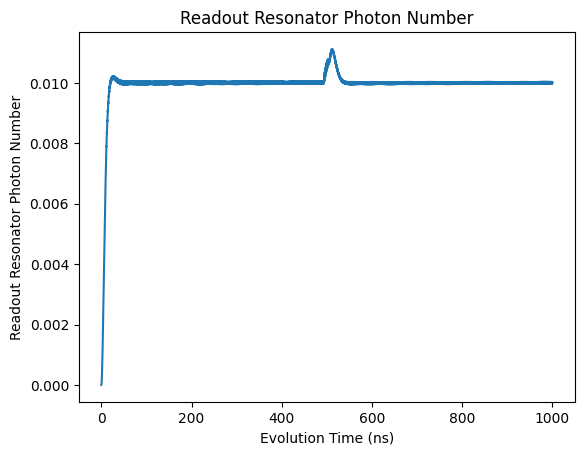

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## $B=2\pi 50MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.05 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

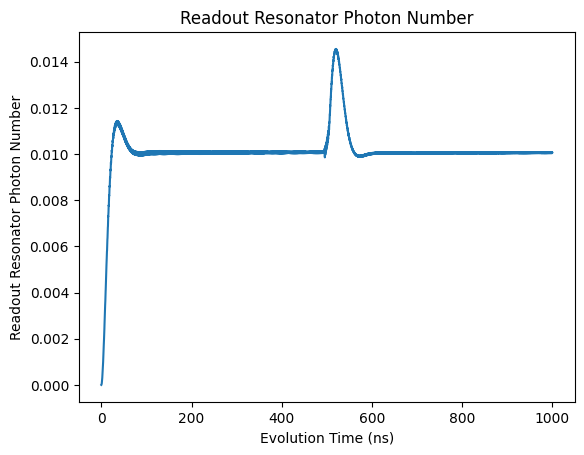

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

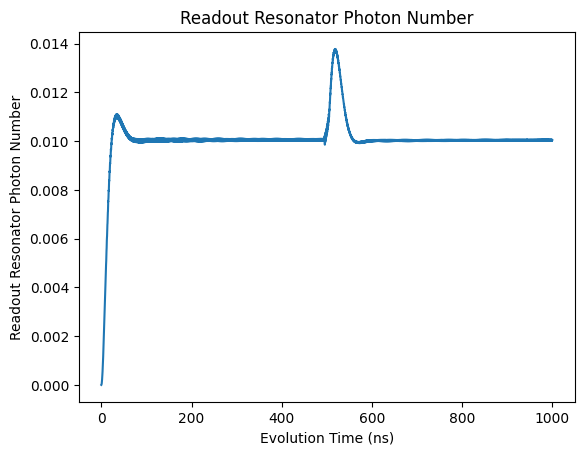

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

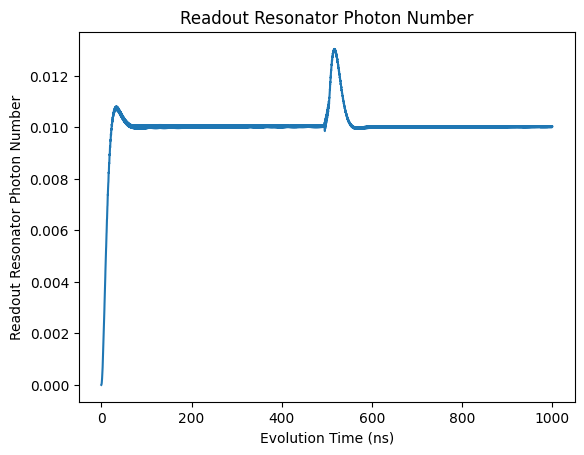

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

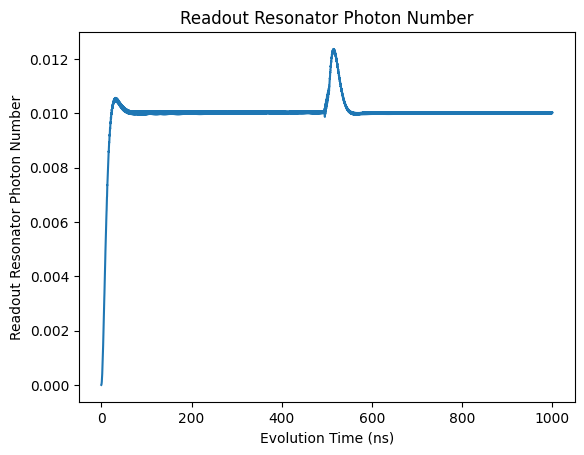

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

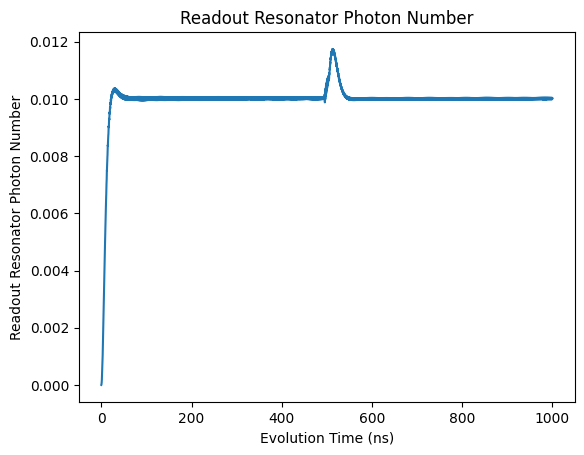

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.01/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

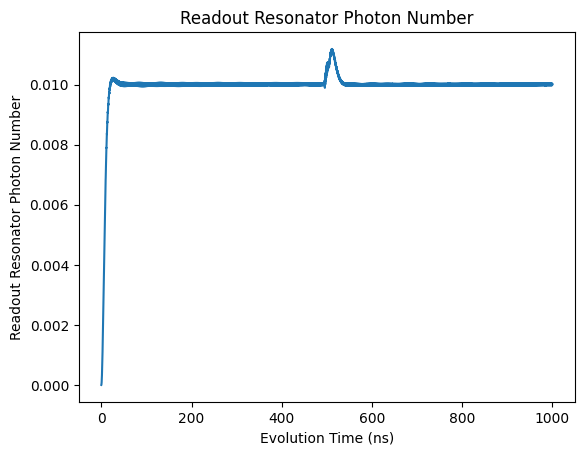

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## Excitation

In [ ]:
maxphoton_simulation

[0.012098823859103767,
 0.01162993763681668,
 0.011257893550135477,
 0.010968861777299239,
 0.010762491530388111,
 0.010627876865121122,
 0.01367763755068954,
 0.012971996651582938,
 0.012308735373815237,
 0.011686190450871284,
 0.011115804719306349,
 0.010835506797648872,
 0.014263820558361865,
 0.013515519597576483,
 0.012799108513852369,
 0.012128105903138554,
 0.011508736023336578,
 0.010947697377236743,
 0.014504193773611129,
 0.013734921061325844,
 0.013007172382100068,
 0.01232193572689532,
 0.011694161033714026,
 0.011128049900110275,
 0.01455104281096732,
 0.01378538166028713,
 0.013051538245085773,
 0.01237054080404188,
 0.011747054386596442,
 0.011188276587153571]

maxphoton_simulation

[0.012098823859103767,
 0.01162993763681668,
 0.011257893550135477,
 0.010968861777299239,
 0.010762491530388111,
 0.010627876865121122,
 0.01367763755068954,
 0.012971996651582938,
 0.012308735373815237,
 0.011686190450871284,
 0.011115804719306349,
 0.010835506797648872,
 0.014263820558361865,
 0.013515519597576483,
 0.012799108513852369,
 0.012128105903138554,
 0.011508736023336578,
 0.010947697377236743,
 0.014504193773611129,
 0.013734921061325844,
 0.013007172382100068,
 0.01232193572689532,
 0.011694161033714026,
 0.011128049900110275,
 0.01455104281096732,
 0.01378538166028713,
 0.013051538245085773,
 0.01237054080404188,
 0.011747054386596442,
 0.011188276587153571]

In [ ]:
maxphoton_simulation = [0.012098823859103767,
 0.01162993763681668,
 0.011257893550135477,
 0.010968861777299239,
 0.010762491530388111,
 0.010627876865121122,
 0.01367763755068954,
 0.012971996651582938,
 0.012308735373815237,
 0.011686190450871284,
 0.011115804719306349,
 0.010835506797648872,
 0.014263820558361865,
 0.013515519597576483,
 0.012799108513852369,
 0.012128105903138554,
 0.011508736023336578,
 0.010947697377236743,
 0.014504193773611129,
 0.013734921061325844,
 0.013007172382100068,
 0.01232193572689532,
 0.011694161033714026,
 0.011128049900110275,
 0.01455104281096732,
 0.01378538166028713,
 0.013051538245085773,
 0.01237054080404188,
 0.011747054386596442,
 0.011188276587153571]


maxphoton_simulation = np.array(maxphoton_simulation)

(0.01, 0.015)

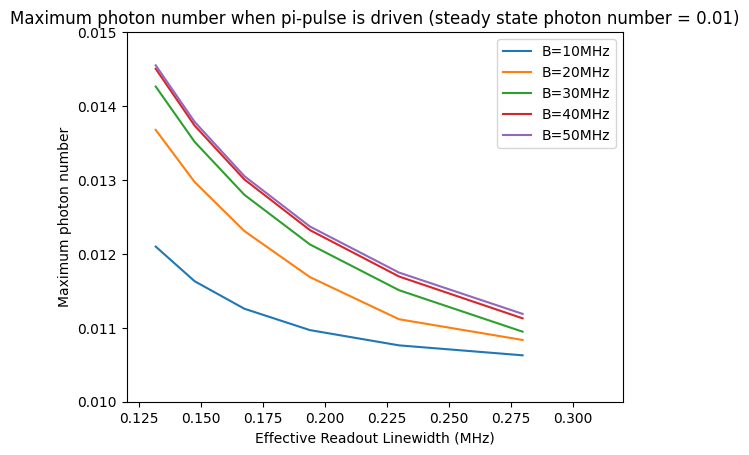

In [ ]:
# Plot Results

kappa_list = np.array([0.1316734544309056, 0.14738053986157504, 0.16743517287832077, 0.19384346406886288, 0.2297891027877527, 0.2796156184458503])

plt.plot(kappa_list, maxphoton_simulation[0:6], label="B=10MHz")
plt.plot(kappa_list, maxphoton_simulation[6:12], label="B=20MHz")
plt.plot(kappa_list, maxphoton_simulation[12:18], label="B=30MHz")
plt.plot(kappa_list, maxphoton_simulation[18:24], label="B=40MHz")
plt.plot(kappa_list, maxphoton_simulation[24:30], label="B=50MHz")

plt.legend()
plt.title('Maximum photon number when pi-pulse is driven (steady state photon number = 0.01)')
plt.xlabel('Effective Readout Linewidth (MHz)')
plt.ylabel('Maximum photon number')
plt.xlim(0.12, 0.32)
plt.ylim(0.01, 0.015)

# Maximum Photon Number (fixed steady state photon number 0.01) $\pi$ pulse $G=2\pi 50MHz$

$n = 0.001$

In [ ]:
rkappa_simulation = np.array([0.04923754279033691,
 0.041583062538215795,
 0.035814672270080186,
 0.03139675094200489,
 0.027931920781119543,
 0.025150788224950257,
 0.10946869476482149,
 0.0900466388347687,
 0.076080860599921,
 0.06581970365623946,
 0.058016998355638824,
 0.05189406996775679,
 0.1668630484402444,
 0.13692145879312892,
 0.11540517973905985,
 0.099646600250414,
 0.08770398072520952,
 0.07836078720717052,
 0.22319170415481224,
 0.1832665453649386,
 0.15450567143329377,
 0.133409353331026,
 0.1174092065321609,
 0.10488786846167904,
 0.2796156184458503,
 0.2297891027877527,
 0.19384346406886288,
 0.16743517287832077,
 0.14738053986157504,
 0.1316734544309056])

In [ ]:
rphoton_standard = np.array([0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268])

In [ ]:
maxphoton_simulation = []

## $B=2\pi 10MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

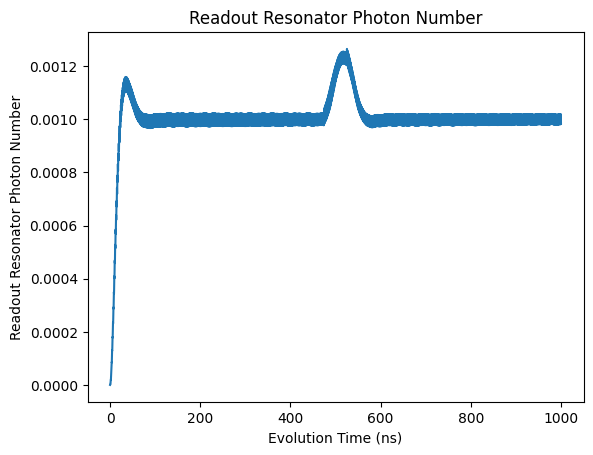

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

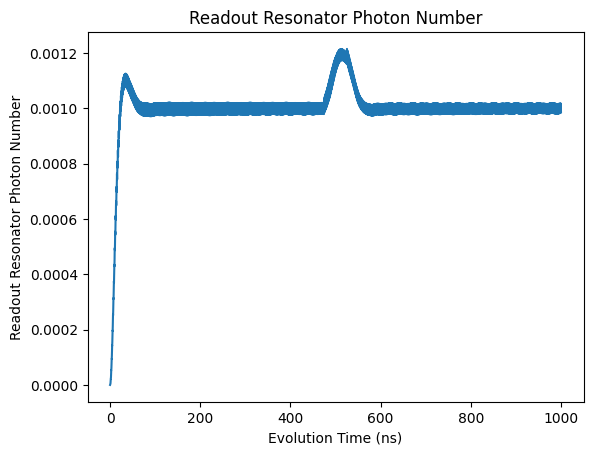

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

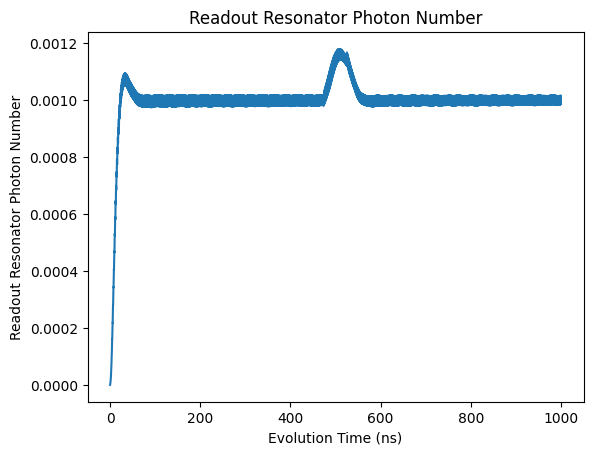

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

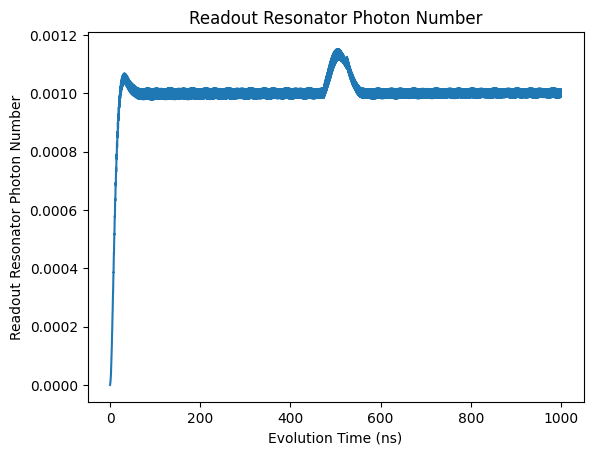

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

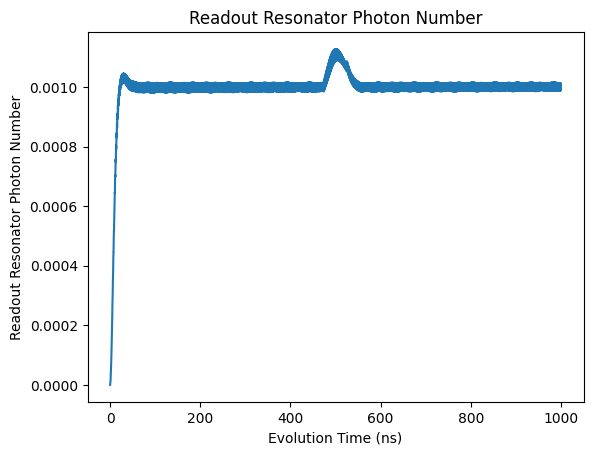

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

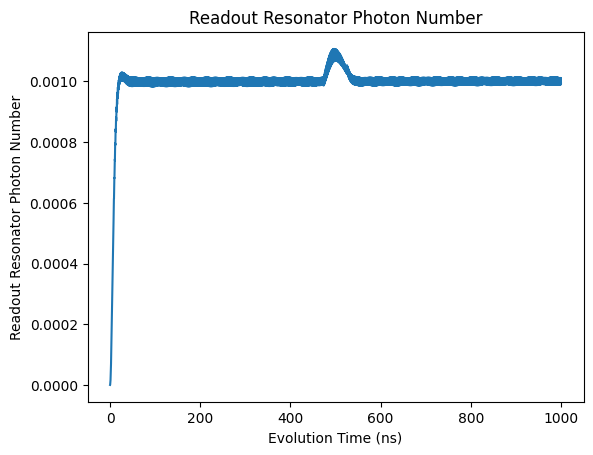

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## $B=2\pi 20MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.02 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

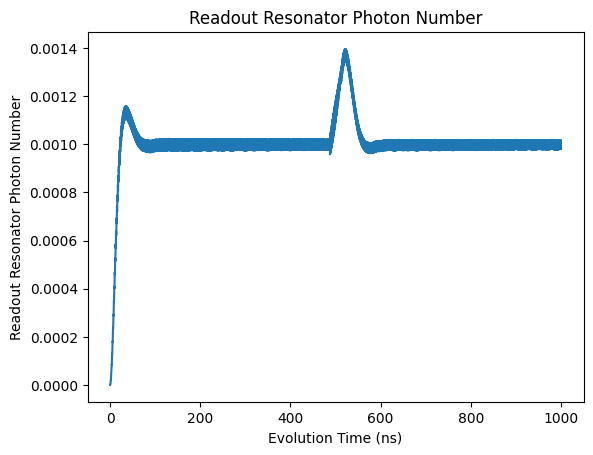

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

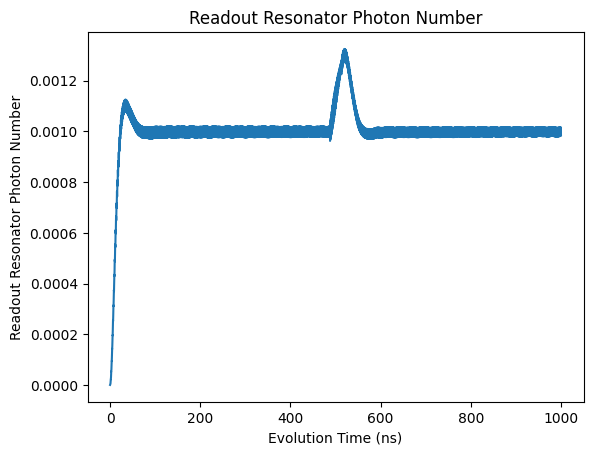

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

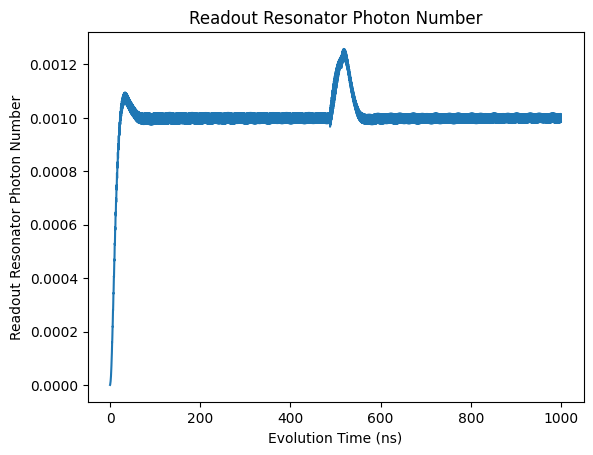

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

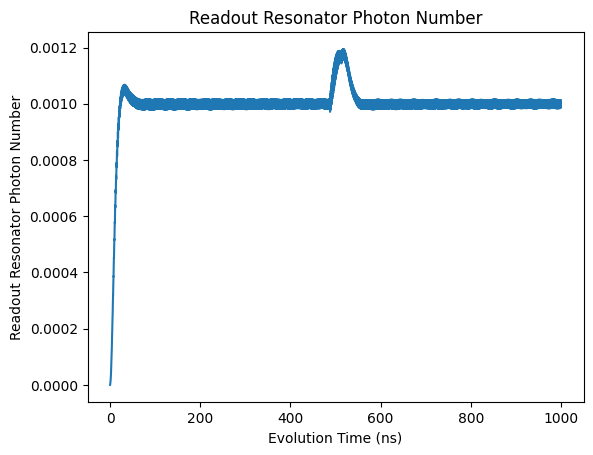

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

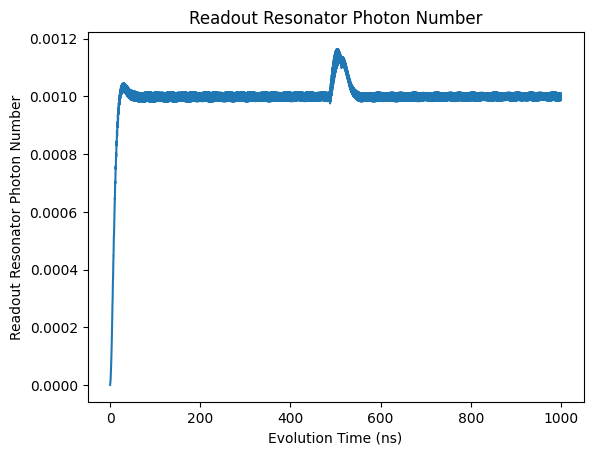

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

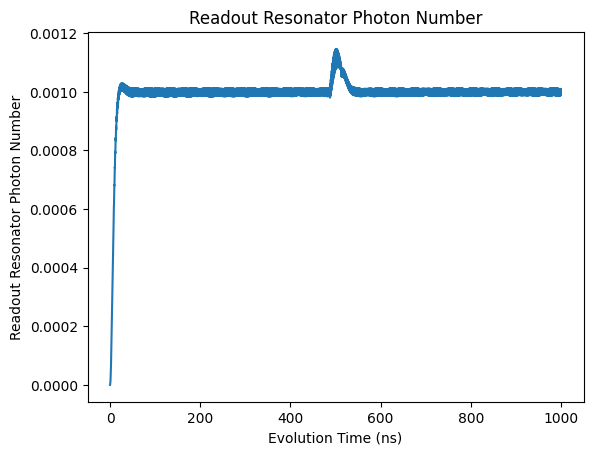

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## $B=2\pi 30MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.03 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

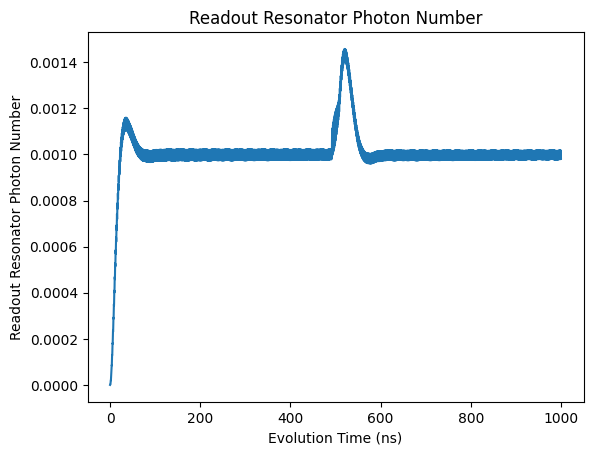

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

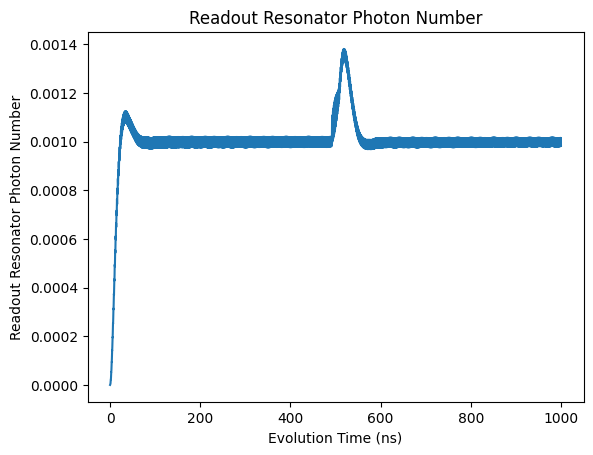

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

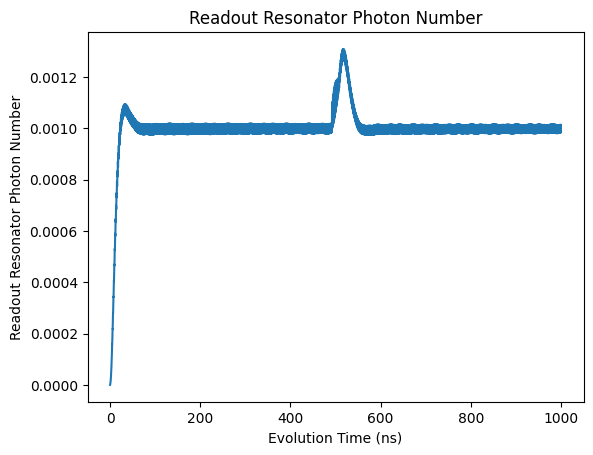

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

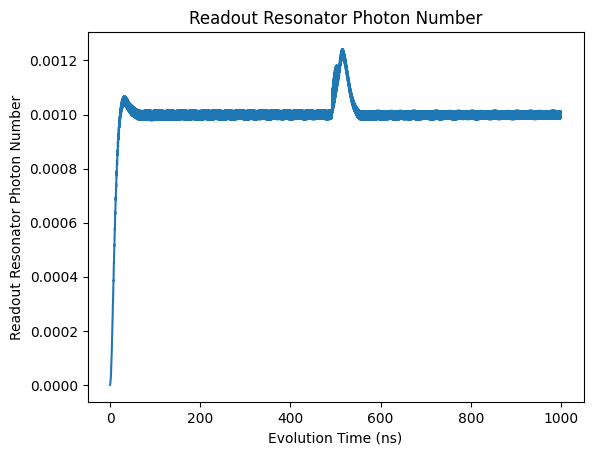

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

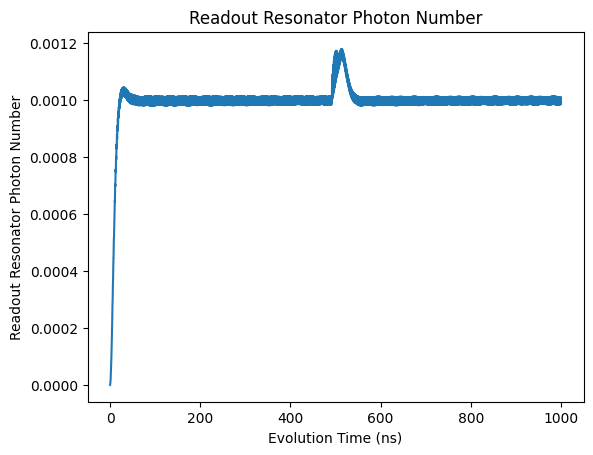

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

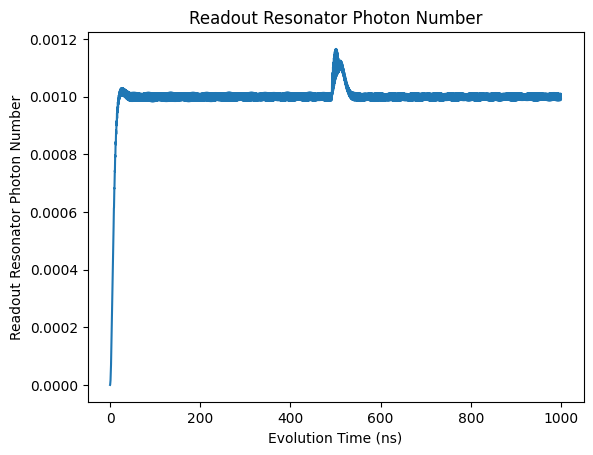

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## $B=2\pi 40MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.04 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

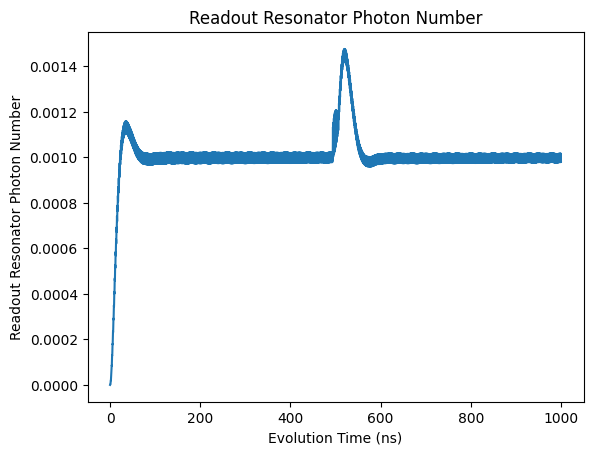

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

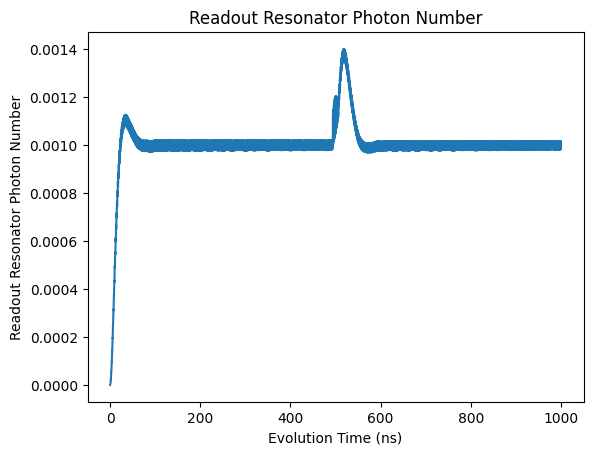

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

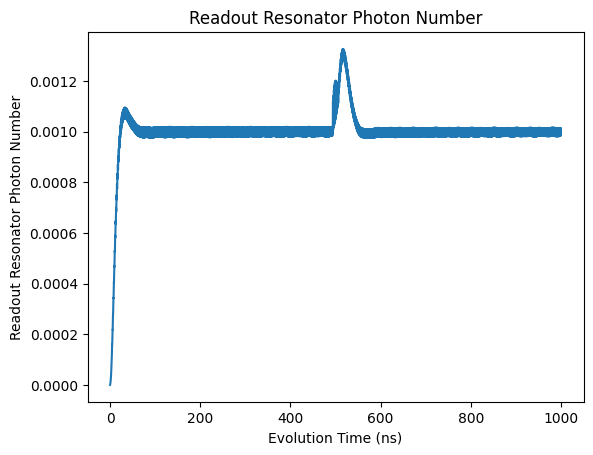

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

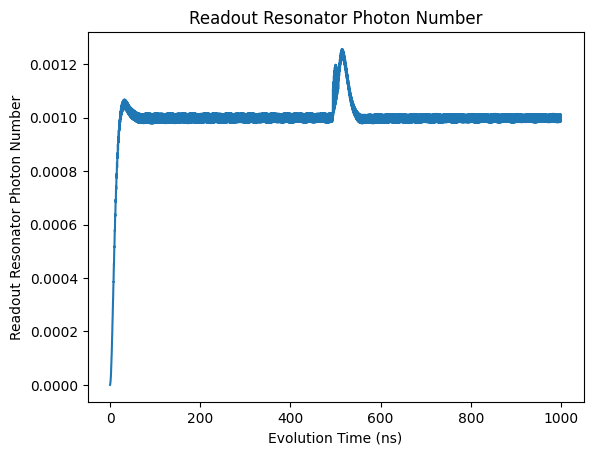

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

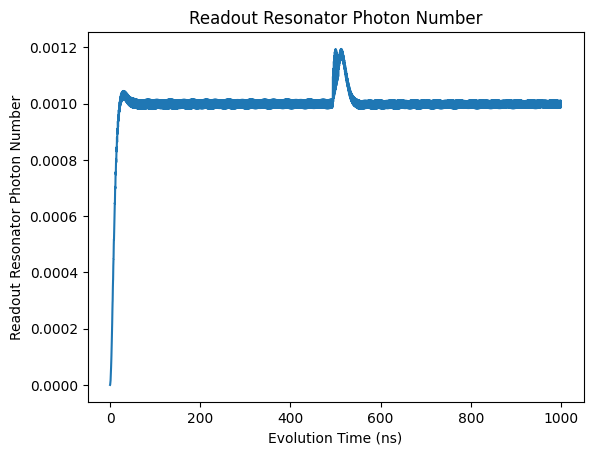

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

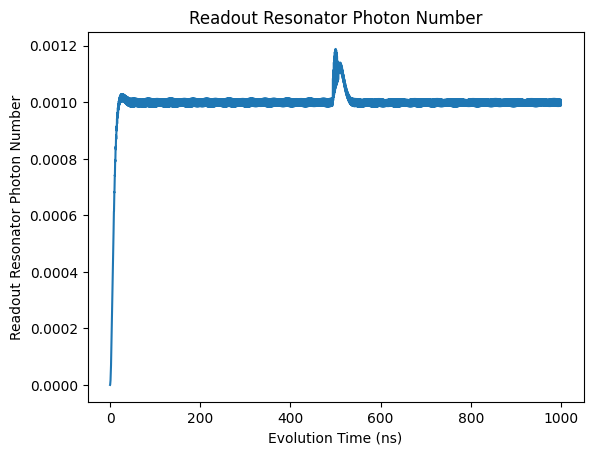

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## $B=2\pi 50MHz$

### Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.05 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [ ]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 500MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[29])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

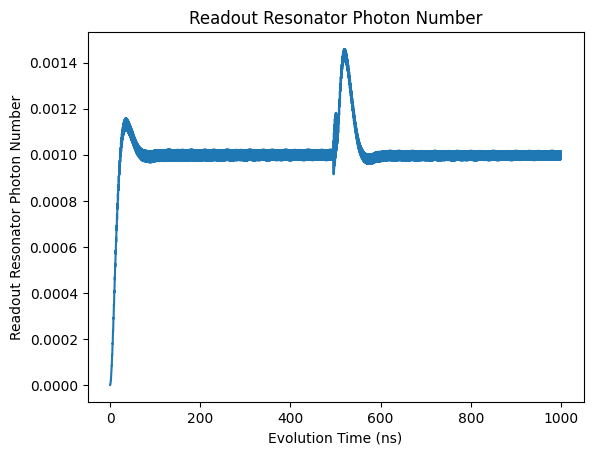

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 450MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[28])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

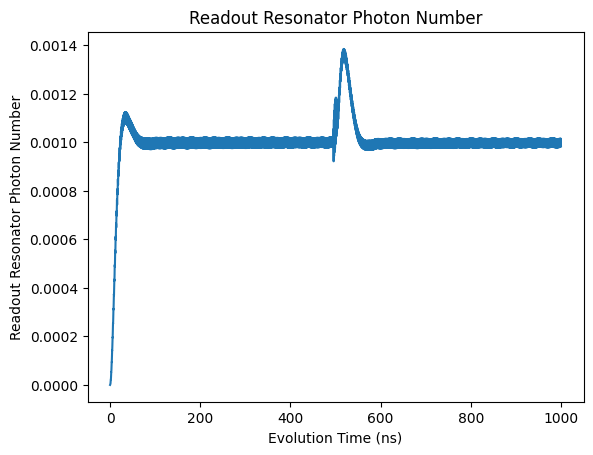

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 400MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[27])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

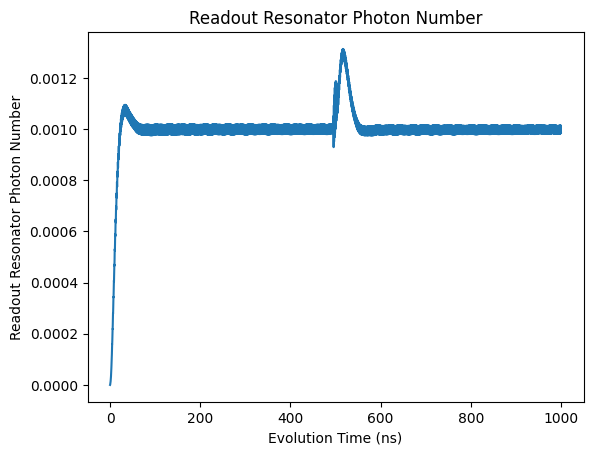

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 350MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[26])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

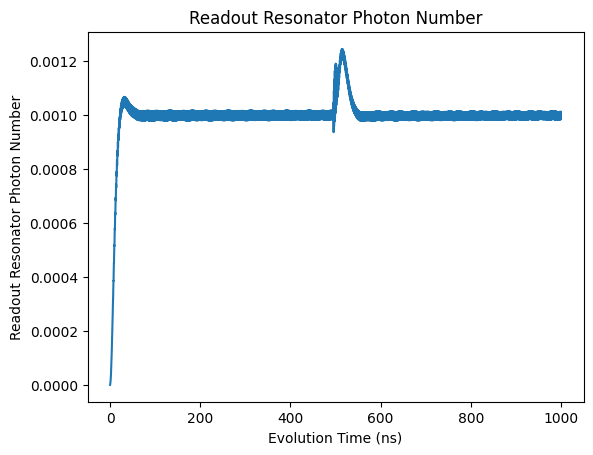

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 300MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[25])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

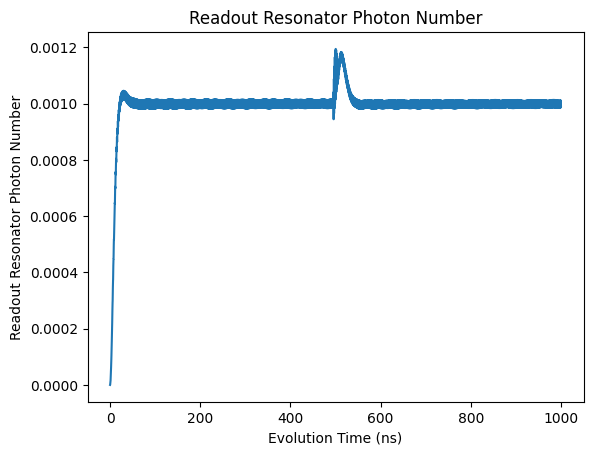

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

### $ \kappa = 2\pi 250MHz$

In [ ]:
# Simulation

N_seq = 1
A = 0.0005 * 2 * np.pi * np.sqrt(0.001/rphoton_standard[24])
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 1000, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

Text(0, 0.5, 'Readout Resonator Photon Number')

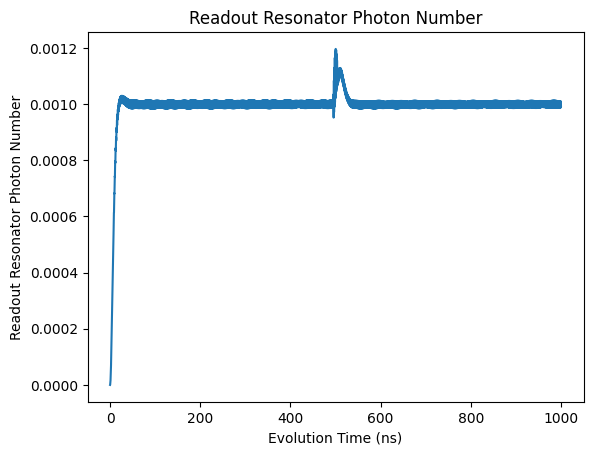

In [ ]:
# Plot Results

plt.plot(tlist, result.expect[4])

plt.title('Readout Resonator Photon Number')
plt.xlabel('Evolution Time (ns)')
plt.ylabel('Readout Resonator Photon Number')

In [ ]:
maxphoton_simulation.append(np.max(result.expect[4][5000:]))

## Excitation

In [ ]:
maxphoton_simulation

[0.001264962549527402,
 0.0012151581494698335,
 0.0011803584445151836,
 0.0011518091143645983,
 0.0011278405617093765,
 0.001105877871314836,
 0.00139667408958304,
 0.0013256447208236405,
 0.001258183600244177,
 0.0011949698359400938,
 0.0011644971641776617,
 0.00114659179969186,
 0.001457860544044162,
 0.001381547852794703,
 0.0013099955151810337,
 0.0012426032044555845,
 0.0011805298882414394,
 0.0011650854769672612,
 0.0014770980747302064,
 0.0013998296851309127,
 0.0013262155459325448,
 0.001257109829051857,
 0.0011946991426247298,
 0.0011887089180465053,
 0.00146000739417847,
 0.0013853029033761577,
 0.0013129778121466946,
 0.0012451582038870877,
 0.0011941775801371773,
 0.0011960889748267713]

maxphoton_simulation

[0.001264962549527402,
 0.0012151581494698335,
 0.0011803584445151836,
 0.0011518091143645983,
 0.0011278405617093765,
 0.001105877871314836,
 0.00139667408958304,
 0.0013256447208236405,
 0.001258183600244177,
 0.0011949698359400938,
 0.0011644971641776617,
 0.00114659179969186,
 0.001457860544044162,
 0.001381547852794703,
 0.0013099955151810337,
 0.0012426032044555845,
 0.0011805298882414394,
 0.0011650854769672612,
 0.0014770980747302064,
 0.0013998296851309127,
 0.0013262155459325448,
 0.001257109829051857,
 0.0011946991426247298,
 0.0011887089180465053,
 0.00146000739417847,
 0.0013853029033761577,
 0.0013129778121466946,
 0.0012451582038870877,
 0.0011941775801371773,
 0.0011960889748267713]

In [ ]:
maxphoton_simulation = [0.001264962549527402,
 0.0012151581494698335,
 0.0011803584445151836,
 0.0011518091143645983,
 0.0011278405617093765,
 0.001105877871314836,
 0.00139667408958304,
 0.0013256447208236405,
 0.001258183600244177,
 0.0011949698359400938,
 0.0011644971641776617,
 0.00114659179969186,
 0.001457860544044162,
 0.001381547852794703,
 0.0013099955151810337,
 0.0012426032044555845,
 0.0011805298882414394,
 0.0011650854769672612,
 0.0014770980747302064,
 0.0013998296851309127,
 0.0013262155459325448,
 0.001257109829051857,
 0.0011946991426247298,
 0.0011887089180465053,
 0.00146000739417847,
 0.0013853029033761577,
 0.0013129778121466946,
 0.0012451582038870877,
 0.0011941775801371773,
 0.0011960889748267713]


maxphoton_simulation = np.array(maxphoton_simulation)

(0.001, 0.0015)

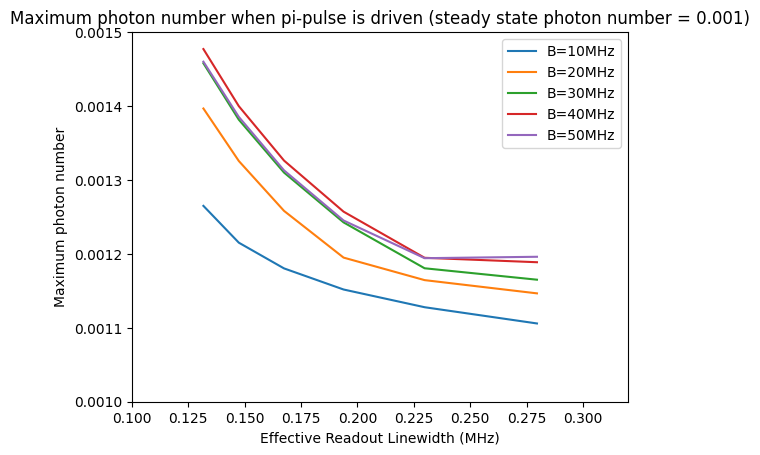

In [ ]:
# Plot Results

kappa_list = np.array([0.1316734544309056, 0.14738053986157504, 0.16743517287832077, 0.19384346406886288, 0.2297891027877527, 0.2796156184458503])

plt.plot(kappa_list, maxphoton_simulation[0:6], label="B=10MHz")
plt.plot(kappa_list, maxphoton_simulation[6:12], label="B=20MHz")
plt.plot(kappa_list, maxphoton_simulation[12:18], label="B=30MHz")
plt.plot(kappa_list, maxphoton_simulation[18:24], label="B=40MHz")
plt.plot(kappa_list, maxphoton_simulation[24:30], label="B=50MHz")

plt.legend()
plt.title('Maximum photon number when pi-pulse is driven (steady state photon number = 0.001)')
plt.xlabel('Effective Readout Linewidth (MHz)')
plt.ylabel('Maximum photon number')
plt.xlim(0.10, 0.32)
plt.ylim(0.001, 0.0015)

# Coherence

XY4

## Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

omega_qd0 = 2 * np.pi * 5.9901545

In [ ]:
coherence_list = []
z_list = []
ramsey_coherence_list = []

In [ ]:
N_seq = 0

omega_qd = omega_qd0

for i in range(6):

      A = 2 * np.pi * 0.0005 * np.sqrt(0.01/rphoton_standard[29-i])
      B = 2 * np.pi * 0.01

      kappa_f = 2 * np.pi * 0.050 * (10-i)


      tlist = np.linspace(0, 500, 5000)
      T_end_q = 500

      result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
        psis_dressed,
        tlist,
        c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': T_end_q, 'N_seq': N_seq, 'Omega_qd': omega_qd},
        e_ops = op_list,
      )

      x_rot = + np.cos(omega_qd*tlist) * result.expect[0] - np.sin(omega_qd*tlist) * result.expect[1]
      y_rot = + np.sin(omega_qd*tlist) * result.expect[0] + np.cos(omega_qd*tlist) * result.expect[1]

      ramsey_coherence_list.append(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))

In [ ]:
ramsey_coherence_list

[0.30340235674270205,
 0.3108752179190162,
 0.3251078794570748,
 0.3486594033832256,
 0.3851783813980333,
 0.43991849567971225]

In [ ]:
ramsey_coherence_list = np.array([0.30340235674270205,
 0.3108752179190162,
 0.3251078794570748,
 0.3486594033832256,
 0.3851783813980333,
 0.43991849567971225])

## XY4 Coherent Error

In [ ]:
# Simulation

N_seq = 4

omega_qd = omega_qd0


for j in range(5):
  print(j)
  for i in range(6):

      A = 2 * np.pi * 0.0005 * np.sqrt(0.01/rphoton_standard[29-i])
      B = 2 * np.pi * 0.01 * (j+1)

      kappa_f = 2 * np.pi * 0.050 * (10-i)


      tlist = np.linspace(0, 500, 5000)
      T_end_q = 500


      result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, XY4_lab_frame]],
        psis_dressed,
        tlist,
        c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': T_end_q, 'N_seq': N_seq, 'Omega_qd': omega_qd},
        e_ops = op_list,
      )

      x_rot = + np.cos(omega_qd*tlist) * result.expect[0] - np.sin(omega_qd*tlist) * result.expect[1]
      y_rot = + np.sin(omega_qd*tlist) * result.expect[0] + np.cos(omega_qd*tlist) * result.expect[1]

      coherence_list.append(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
      z_list.append(result.expect[2][-1])

0
1
2
3
4


In [ ]:
coherence_list

[0.35199952856695144,
 0.3624793440701398,
 0.3783443923903878,
 0.401652396191776,
 0.4355159200026474,
 0.48475130258445503,
 0.33602072029768043,
 0.34738381031524673,
 0.36402512950238836,
 0.3881533359939834,
 0.42286705710722355,
 0.4729272416432286,
 0.33303961044964814,
 0.344668215846706,
 0.36163031235924115,
 0.3860157843797224,
 0.42080546429470556,
 0.4708937844985347,
 0.3320347982156753,
 0.3438904265998543,
 0.3609943687729165,
 0.38538890593059166,
 0.4203827443244137,
 0.4705735370345873,
 0.33190811490027083,
 0.3436226653806925,
 0.3607196923881375,
 0.38511400752730995,
 0.4199735023647691,
 0.47005739341367575]

In [ ]:
z_list

[-0.0412111865323201,
 -0.04684596900055179,
 -0.05335200348280543,
 -0.0609932288909725,
 -0.06992392266469599,
 -0.07969392174562967,
 -0.02367399637044882,
 -0.026597640416685175,
 -0.029770804370626465,
 -0.03339687230803966,
 -0.03719568657968475,
 -0.04105573187277705,
 -0.012099351847389767,
 -0.014808820966101645,
 -0.01722195747701085,
 -0.019730528731504274,
 -0.022578006953055618,
 -0.02509496031233037,
 -0.005512343040038213,
 -0.0077646729145932365,
 -0.009544417702361458,
 -0.011886787031836894,
 -0.01399249608871437,
 -0.015442562247046713,
 -0.0011061537870901631,
 -0.0028953368028658516,
 -0.004747256505935653,
 -0.0065211542789225365,
 -0.008390642945644332,
 -0.009750738897641418]

In [ ]:
coherence_list = np.array([0.35199952856695144,
 0.3624793440701398,
 0.3783443923903878,
 0.401652396191776,
 0.4355159200026474,
 0.48475130258445503,
 0.33602072029768043,
 0.34738381031524673,
 0.36402512950238836,
 0.3881533359939834,
 0.42286705710722355,
 0.4729272416432286,
 0.33303961044964814,
 0.344668215846706,
 0.36163031235924115,
 0.3860157843797224,
 0.42080546429470556,
 0.4708937844985347,
 0.3320347982156753,
 0.3438904265998543,
 0.3609943687729165,
 0.38538890593059166,
 0.4203827443244137,
 0.4705735370345873,
 0.33190811490027083,
 0.3436226653806925,
 0.3607196923881375,
 0.38511400752730995,
 0.4199735023647691,
 0.47005739341367575])

In [ ]:
z_list = np.array([-0.0412111865323201,
 -0.04684596900055179,
 -0.05335200348280543,
 -0.0609932288909725,
 -0.06992392266469599,
 -0.07969392174562967,
 -0.02367399637044882,
 -0.026597640416685175,
 -0.029770804370626465,
 -0.03339687230803966,
 -0.03719568657968475,
 -0.04105573187277705,
 -0.012099351847389767,
 -0.014808820966101645,
 -0.01722195747701085,
 -0.019730528731504274,
 -0.022578006953055618,
 -0.02509496031233037,
 -0.005512343040038213,
 -0.0077646729145932365,
 -0.009544417702361458,
 -0.011886787031836894,
 -0.01399249608871437,
 -0.015442562247046713,
 -0.0011061537870901631,
 -0.0028953368028658516,
 -0.004747256505935653,
 -0.0065211542789225365,
 -0.008390642945644332,
 -0.009750738897641418])

Text(0, 0.5, 'Final Coherence')

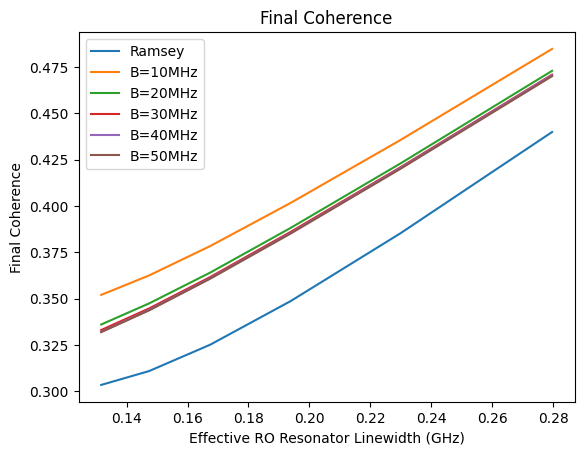

In [ ]:
# Plot Results

kappa_list = np.array([0.1316734544309056, 0.14738053986157504, 0.16743517287832077, 0.19384346406886288, 0.2297891027877527, 0.2796156184458503])

plt.plot(kappa_list, ramsey_coherence_list, label="Ramsey")

plt.plot(kappa_list, coherence_list[0:6], label="B=10MHz")
plt.plot(kappa_list, coherence_list[6:12], label="B=20MHz")
plt.plot(kappa_list, coherence_list[12:18], label="B=30MHz")
plt.plot(kappa_list, coherence_list[18:24], label="B=40MHz")
plt.plot(kappa_list, coherence_list[24:30], label="B=50MHz")


plt.legend()
plt.title('Final Coherence')
plt.xlabel('Effective RO Resonator Linewidth (GHz)')
plt.ylabel('Final Coherence')

Text(0, 0.5, 'Final Z')

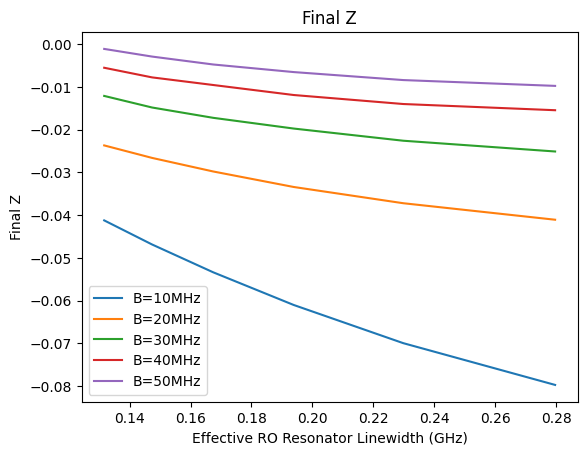

In [ ]:
# Plot Results

kappa_list = np.array([0.1316734544309056, 0.14738053986157504, 0.16743517287832077, 0.19384346406886288, 0.2297891027877527, 0.2796156184458503])

plt.plot(kappa_list, z_list[0:6], label="B=10MHz")
plt.plot(kappa_list, z_list[6:12], label="B=20MHz")
plt.plot(kappa_list, z_list[12:18], label="B=30MHz")
plt.plot(kappa_list, z_list[18:24], label="B=40MHz")
plt.plot(kappa_list, z_list[24:30], label="B=50MHz")

plt.legend()
plt.title('Final Z')
plt.xlabel('Effective RO Resonator Linewidth (GHz)')
plt.ylabel('Final Z')

# Coherence

XY8

## Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

omega_qd0 = 2 * np.pi * 5.9901545

In [ ]:
coherence_list = []
z_list = []
ramsey_coherence_list = []

In [ ]:
N_seq = 0

omega_qd = omega_qd0

for i in range(6):

      A = 2 * np.pi * 0.0005 * np.sqrt(0.01/rphoton_standard[29-i])
      B = 2 * np.pi * 0.01

      kappa_f = 2 * np.pi * 0.050 * (10-i)


      tlist = np.linspace(0, 500, 5000)
      T_end_q = 500

      result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
        psis_dressed,
        tlist,
        c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': T_end_q, 'N_seq': N_seq, 'Omega_qd': omega_qd},
        e_ops = op_list,
      )

      x_rot = + np.cos(omega_qd*tlist) * result.expect[0] - np.sin(omega_qd*tlist) * result.expect[1]
      y_rot = + np.sin(omega_qd*tlist) * result.expect[0] + np.cos(omega_qd*tlist) * result.expect[1]

      ramsey_coherence_list.append(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))

In [ ]:
ramsey_coherence_list

[0.30340235674270205,
 0.3108752179190162,
 0.3251078794570748,
 0.3486594033832256,
 0.3851783813980333,
 0.43991849567971225]

In [ ]:
ramsey_coherence_list = np.array([0.30340235674270205,
 0.3108752179190162,
 0.3251078794570748,
 0.3486594033832256,
 0.3851783813980333,
 0.43991849567971225])

## XY8 Coherent Error

In [ ]:
# Simulation

N_seq = 8

omega_qd = omega_qd0


for j in range(5):
  print(j)
  for i in range(6):

      A = 2 * np.pi * 0.0005 * np.sqrt(0.01/rphoton_standard[29-i])
      B = 2 * np.pi * 0.01 * (j+1)

      kappa_f = 2 * np.pi * 0.050 * (10-i)


      tlist = np.linspace(0, 500, 5000)
      T_end_q = 500


      result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, XY8_lab_frame]],
        psis_dressed,
        tlist,
        c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': T_end_q, 'N_seq': N_seq, 'Omega_qd': omega_qd},
        e_ops = op_list,
      )

      x_rot = + np.cos(omega_qd*tlist) * result.expect[0] - np.sin(omega_qd*tlist) * result.expect[1]
      y_rot = + np.sin(omega_qd*tlist) * result.expect[0] + np.cos(omega_qd*tlist) * result.expect[1]

      coherence_list.append(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
      z_list.append(result.expect[2][-1])

0
1
2
3
4


In [ ]:
coherence_list

[0.40701488406141995,
 0.42115957601902193,
 0.4394159899592655,
 0.4631499608199384,
 0.4952951558676147,
 0.5401483092969781,
 0.37321671047269467,
 0.38871083456677746,
 0.40811311899655944,
 0.43291036111922476,
 0.46577886613500186,
 0.5109678171268407,
 0.3665922935958224,
 0.38225139045766093,
 0.40179934810639173,
 0.4263957776452253,
 0.45913689236274713,
 0.5036797911071969,
 0.3643080123179893,
 0.38012810251117496,
 0.3993272164951923,
 0.4240830137093241,
 0.45668618462654503,
 0.5012945104184948,
 0.36413460514285695,
 0.3788410843447634,
 0.39943062525671486,
 0.42420676477094377,
 0.4559022238880722,
 0.5006167587127904]

In [ ]:
z_list

[-0.010338455181151581,
 -0.009503532938290267,
 -0.008596776610752069,
 -0.007215853515262586,
 -0.005870123966948874,
 -0.0042227185741729595,
 -0.009302878417783609,
 -0.007464556088711782,
 -0.005425748153291545,
 -0.003462483535996205,
 -0.001467335261762052,
 0.00042529767589567194,
 -0.004038483855665824,
 -0.002031783683809185,
 -4.171601727513578e-05,
 0.0019348848187095233,
 0.0037691532250961847,
 0.0051556837216849795,
 0.0020445989322561645,
 0.0030874189878520204,
 0.004849869329894616,
 0.006690350582609613,
 0.008217789162534444,
 0.009660484268512733,
 0.0064642454541352255,
 0.007779258759212149,
 0.009229330255093229,
 0.010465255184503005,
 0.011819598394581918,
 0.01288988358487888]

In [ ]:
coherence_list = np.array([0.40701488406141995,
 0.42115957601902193,
 0.4394159899592655,
 0.4631499608199384,
 0.4952951558676147,
 0.5401483092969781,
 0.37321671047269467,
 0.38871083456677746,
 0.40811311899655944,
 0.43291036111922476,
 0.46577886613500186,
 0.5109678171268407,
 0.3665922935958224,
 0.38225139045766093,
 0.40179934810639173,
 0.4263957776452253,
 0.45913689236274713,
 0.5036797911071969,
 0.3643080123179893,
 0.38012810251117496,
 0.3993272164951923,
 0.4240830137093241,
 0.45668618462654503,
 0.5012945104184948,
 0.36413460514285695,
 0.3788410843447634,
 0.39943062525671486,
 0.42420676477094377,
 0.4559022238880722,
 0.5006167587127904])

In [ ]:
z_list = np.array([-0.010338455181151581,
 -0.009503532938290267,
 -0.008596776610752069,
 -0.007215853515262586,
 -0.005870123966948874,
 -0.0042227185741729595,
 -0.009302878417783609,
 -0.007464556088711782,
 -0.005425748153291545,
 -0.003462483535996205,
 -0.001467335261762052,
 0.00042529767589567194,
 -0.004038483855665824,
 -0.002031783683809185,
 -4.171601727513578e-05,
 0.0019348848187095233,
 0.0037691532250961847,
 0.0051556837216849795,
 0.0020445989322561645,
 0.0030874189878520204,
 0.004849869329894616,
 0.006690350582609613,
 0.008217789162534444,
 0.009660484268512733,
 0.0064642454541352255,
 0.007779258759212149,
 0.009229330255093229,
 0.010465255184503005,
 0.011819598394581918,
 0.01288988358487888])

Text(0, 0.5, 'Final Coherence')

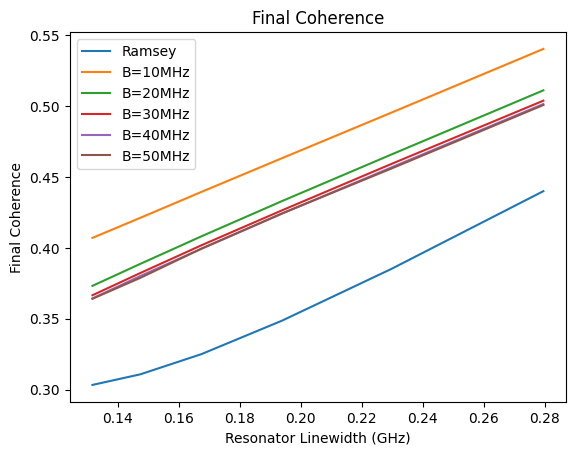

In [ ]:
# Plot Results

kappa_list = np.array([0.1316734544309056, 0.14738053986157504, 0.16743517287832077, 0.19384346406886288, 0.2297891027877527, 0.2796156184458503])

plt.plot(kappa_list, ramsey_coherence_list, label="Ramsey")

plt.plot(kappa_list, coherence_list[0:6], label="B=10MHz")
plt.plot(kappa_list, coherence_list[6:12], label="B=20MHz")
plt.plot(kappa_list, coherence_list[12:18], label="B=30MHz")
plt.plot(kappa_list, coherence_list[18:24], label="B=40MHz")
plt.plot(kappa_list, coherence_list[24:30], label="B=50MHz")


plt.legend()
plt.title('Final Coherence')
plt.xlabel('Resonator Linewidth (GHz)')
plt.ylabel('Final Coherence')

Text(0, 0.5, 'Final Z')

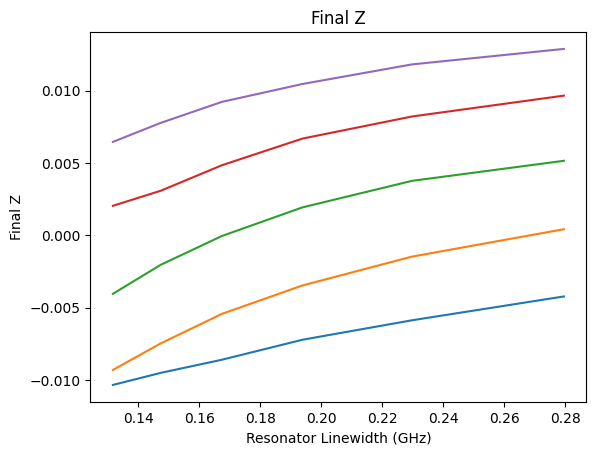

In [ ]:
# Plot Results

kappa_list = np.array([0.1316734544309056, 0.14738053986157504, 0.16743517287832077, 0.19384346406886288, 0.2297891027877527, 0.2796156184458503])

plt.plot(kappa_list, z_list[0:6], label="B=10MHz")
plt.plot(kappa_list, z_list[6:12], label="B=20MHz")
plt.plot(kappa_list, z_list[12:18], label="B=30MHz")
plt.plot(kappa_list, z_list[18:24], label="B=40MHz")
plt.plot(kappa_list, z_list[24:30], label="B=50MHz")

plt.title('Final Z')
plt.xlabel('Resonator Linewidth (GHz)')
plt.ylabel('Final Z')

# Time Evolution

## Setting

In [ ]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [ ]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [ ]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

omega_qd0 = 2 * np.pi * 5.9901545

In [ ]:
ramsey_coherence_list = []
ramsey_z_list = []

XY4_coherence_list = []
XY4_z_list = []

XY4op1_coherence_list = []
XY4op1_z_list = []

XY8_coherence_list = []
XY8_z_list = []

## Coherence

$ \kappa = 2 \pi 0.050 GHz $

In [ ]:
kappa = 2 * np.pi * 0.250

A = 2 * np.pi * 0.0005 * np.sqrt(0.01/rphoton_standard[24])
B = 2 * np.pi * 0.05
omega_qd = omega_qd0

In [ ]:
# Simulation

N_seq = 0

for j in range(40):
      print(j)

      tlist = np.linspace(0, 50*(j+1), 500*(j+1))
      T_end_q = 50*(j+1)


      result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
        psis_dressed,
        tlist,
        c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': T_end_q, 'N_seq': N_seq, 'Omega_qd': omega_qd},
        e_ops = op_list,
      )

      ramsey_coherence_list.append(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
      ramsey_z_list.append(result.expect[2][-1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
# Simulation

for j in range(40):
      print(j)

      tlist = np.linspace(0, 50*(j+1), 500*(j+1))
      T_end_q = 50*(j+1)


      result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, XY4_lab_frame]],
        psis_dressed,
        tlist,
        c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': T_end_q, 'N_seq': N_seq, 'Omega_qd': omega_qd},
        e_ops = op_list,
      )

      XY4_coherence_list.append(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
      XY4_z_list.append(result.expect[2][-1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
# Simulation

for j in range(40):
      print(j)

      tlist = np.linspace(0, 50*(j+1), 500*(j+1))
      T_end_q = 50*(j+1)


      result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, XY8_lab_frame]],
        psis_dressed,
        tlist,
        c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': T_end_q, 'N_seq': N_seq, 'Omega_qd': omega_qd},
        e_ops = op_list,
      )

      XY8_coherence_list.append(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
      XY8_z_list.append(result.expect[2][-1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
# Simulation

N_seq = 0

for j in range(40):
      print(j)

      tlist = np.linspace(0, 50*(j+1), 500*(j+1))
      T_end_q = 50*(j+1)

      result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, XY4_lab_frame_op1]],
        psis_dressed,
        tlist,
        c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': T_end_q, 'N_seq': N_seq, 'Omega_qd': omega_qd, 'kappa': 0.2796156184458503},
        e_ops = op_list,
      )

      XY4op1_coherence_list.append(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
      XY4op1_z_list.append(result.expect[2][-1])

In [ ]:
ramsey_coherence_list

[0.9376511109930964,
 0.8620751099262206,
 0.7924811090096949,
 0.7286213829744268,
 0.6697954524175269,
 0.6158269994911243,
 0.5661030335718655,
 0.520493738425503,
 0.4784635082316089,
 0.43991849567971225,
 0.40439171849521754,
 0.3718166366925083,
 0.3417872243418409,
 0.3142572122202118,
 0.2888747477320946,
 0.2656082058413815,
 0.24415383557779238,
 0.22449025453356855,
 0.2063563141353974,
 0.1897375353179611,
 0.17441033194491565,
 0.16036470725289603,
 0.14740996764552097,
 0.1355389696438802,
 0.12458954314863942,
 0.11455644725975406,
 0.10530191416173004,
 0.0968222307454528,
 0.08900012029474344,
 0.08183350663910458,
 0.07522187672964635,
 0.06916529986161442,
 0.06357646656634701,
 0.05845842261351699,
 0.053733661878141034,
 0.04940928926953328,
 0.045414360474261124,
 0.041761308220607384,
 0.0383826717089512,
 0.035297605942240705]

In [ ]:
ramsey_z_list

[0.0008557200180977604,
 0.003587165641635768,
 0.004617799555179751,
 0.007191505124162855,
 0.008355547031787421,
 0.010792529287782356,
 0.012070035441609051,
 0.014389234684937198,
 0.015762359203819683,
 0.0179806428249634,
 0.019433574403974915,
 0.021565823827611318,
 0.023084679517464863,
 0.02514391182248971,
 0.026716603425175435,
 0.028714114202609713,
 0.030330198742791567,
 0.03227571571962421,
 0.03392623954663834,
 0.03582807943214117,
 0.037505421983016554,
 0.039370644585523265,
 0.041068367054383596,
 0.0429029235840091,
 0.04461562482235359,
 0.04642449648746751,
 0.04814767969110009,
 0.04993500631235881,
 0.051664955904573526,
 0.0534341524822577,
 0.055167823548392905,
 0.056921685876319364,
 0.0586566042228906,
 0.060397402295974865,
 0.062131576454656154,
 0.06386113757139414,
 0.06559298137949215,
 0.06731276225199827,
 0.06904102722599936,
 0.07075217703857888]

In [ ]:
XY4_coherence_list

[0.9789242545542083,
 0.9162800342059063,
 0.8452228136792062,
 0.7783816554187957,
 0.7163525769600738,
 0.6571616150047652,
 0.6042660226589281,
 0.5551605245153977,
 0.5117389911043414,
 0.47005739341367575,
 0.43187407554059526,
 0.39643743828118294,
 0.3642073091202479,
 0.3352380789757749,
 0.308049857786049,
 0.2835646035439123,
 0.2596752765513933,
 0.2394767771904269,
 0.21983949512501527,
 0.20267756910020038,
 0.18639135451902802,
 0.17093229315499942,
 0.15707991756484155,
 0.14414574133938368,
 0.1331630838693563,
 0.12226634018692403,
 0.11249440602538983,
 0.10281876775623369,
 0.0944445201474652,
 0.08688187986156497,
 0.0800100496914075,
 0.07388024717919486,
 0.06747958297693184,
 0.06207699430038437,
 0.0567260070723257,
 0.05262804066972278,
 0.04841485189137724,
 0.044548314555046424,
 0.04089237909501139,
 0.037404168925542866]

In [ ]:
XY4_z_list

[-0.02520627777019982,
 -0.016318347290499642,
 -0.011137459581031297,
 -0.005789954322907366,
 -0.010097282948391965,
 -0.020132097076319414,
 -0.023099660114671225,
 -0.02499771412764233,
 -0.020986225823745177,
 -0.009750738897641418,
 -0.008555481323298272,
 -0.004039971740600389,
 -0.007357251615874732,
 -0.016538765198828145,
 -0.015815344073299653,
 -0.019592987459763397,
 -0.01668706813097126,
 -0.008095103131929385,
 -0.009330543864213614,
 -0.004538350863949529,
 -0.006399924709868737,
 -0.012501104696603212,
 -0.012066241194910154,
 -0.015450784185894713,
 -0.01451408850422323,
 -0.00917981594941882,
 -0.0083455834932419,
 -0.004258856933061384,
 -0.004741284605505703,
 -0.008887198991045023,
 -0.009762806704916192,
 -0.014068098905452624,
 -0.01384996105126291,
 -0.009865376973082521,
 -0.008338060721540768,
 -0.004206450336583521,
 -0.003799545251163086,
 -0.0067469314470335546,
 -0.009098211228059086,
 -0.012129910496259411]

In [ ]:
XY8_coherence_list

In [ ]:
XY8_z_list

In [ ]:
XY4op1_coherence_list

In [ ]:
XY4op1_z_list

In [ ]:
ramsey_coherence_list = np.array([0.8977401005559078,
 0.7979400509615002,
 0.7093008864275073,
 0.6304292058892603,
 0.5604217485104949,
 0.49808051987729623,
 0.44279503140959103,
 0.39351293035209917,
 0.34986047109004015,
 0.3108947736544877,
 0.27643487892870655,
 0.245618542887388,
 0.2184230784270002,
 0.19404391804307317,
 0.17258951885766485,
 0.15329473859622517,
 0.13637783000094375,
 0.12109859419338717,
 0.10776825448678815,
 0.09566989946338988,
 0.08518597807018238,
 0.07559027727951806,
 0.0673432762648586,
 0.05972030813038032,
 0.05324271601275768,
 0.04717729288261078,
 0.042099622099665085,
 0.037263631109088,
 0.03329385098335102,
 0.02942800006425731,
 0.026335296233040477,
 0.0232346843908399,
 0.020836618261849394,
 0.018339333706923495,
 0.016491698037193105,
 0.014469805847585143,
 0.01305860630967274,
 0.011411024456530215,
 0.010346143952035642,
 0.008993015055398932])


XY4_coherence_list = np.array([0.9401349916528283,
 0.8461348297889647,
 0.7559778862277056,
 0.6761527857193417,
 0.6025411582994721,
 0.5369115073825816,
 0.47946661591982637,
 0.42719767380569423,
 0.3869679933454505,
 0.34251482134112016,
 0.3056455121881174,
 0.2734965660607346,
 0.24213299378410333,
 0.21684919121147783,
 0.19442850593274102,
 0.17424759429132158,
 0.15758335366303694,
 0.1416890120676946,
 0.1258776356576798,
 0.11261667674529821,
 0.09891777577162686,
 0.08884066641440859,
 0.08095440088948613,
 0.07407369374982334,
 0.06964446349622416,
 0.06246539592060191,
 0.05324627559488221,
 0.046987241934834625,
 0.04145885178223961,
 0.0381834070938096,
 0.03797201445974814,
 0.035092513074178835,
 0.03209758424877986,
 0.02842565814449416,
 0.023177966958639534,
 0.022596336029278283,
 0.020717626076573886,
 0.019541605271363796,
 0.02017661744281115,
 0.018255712949023])


XY8_coherence_list = np.array([0.8975397416950012,
 0.8148274352129259,
 0.7322905015150769,
 0.6536974912264101,
 0.581954107142624,
 0.518169161002586,
 0.4595575894613326,
 0.410103786926223,
 0.3636329625614139,
 0.3228457754781708,
 0.28924930565994383,
 0.25703815977477185,
 0.2290463303463164,
 0.2033598497637174,
 0.1813984015114232,
 0.1622208049956374,
 0.14467985652939835,
 0.13053871606861453,
 0.11331109239738296,
 0.10308597783556549,
 0.09199334896091983,
 0.08300345201088044,
 0.07409064641168371,
 0.06522554163769155,
 0.059621607633894624,
 0.0515183663988327,
 0.051352748432743,
 0.044133221778101576,
 0.04073042895043795,
 0.03585915803472123,
 0.03143866142333102,
 0.031074303420154947,
 0.025955912476129682,
 0.026984450171807218,
 0.022869862830586937,
 0.020901198187041028,
 0.02006536133609623,
 0.018320796009551825,
 0.01898638323746922,
 0.016978531167388858])


XY4op1_coherence_list = np.array([0.9410025921401234,
 0.8477087429342495,
 0.7573907169864178,
 0.678425776636878,
 0.6057171733137117,
 0.5437617899322046,
 0.48507004924194325,
 0.4381734998667206,
 0.39015627532961933,
 0.34586693578277794,
 0.31205791269486033,
 0.278710622259382,
 0.24467428202081476,
 0.22199720310560406,
 0.19250365501927696,
 0.18129603244699835,
 0.16168934926643905,
 0.13886964573324784,
 0.13362759082911027,
 0.11697703228334569,
 0.10440582799835607,
 0.09563173544124542,
 0.07967982440816307,
 0.07439343972282972,
 0.06776438659918138,
 0.060366097214645885,
 0.054461081962494585,
 0.049901760529282684,
 0.0398258557413176,
 0.04102656897971357,
 0.049427635327102155,
 0.029569970675482202,
 0.0311178361362243,
 0.022906461756581738,
 0.02395805636834852,
 0.026799724085089963,
 0.032449021680784486,
 0.030935481416531154,
 0.013098957121422127,
 0.02919231908536908])

Text(0, 0.5, 'Final Coherence')

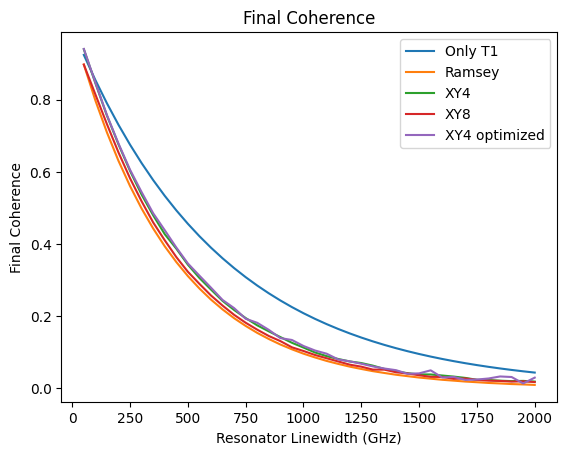

In [ ]:
# Plot Results

tau_list = np.array([50 * (i+1) for i in range(40)])

plt.plot(tau_list, np.exp(-2*np.pi*0.05*0.01*tau_list/2), label="Only T1")
plt.plot(tau_list, ramsey_coherence_list, label="Ramsey")
plt.plot(tau_list, XY4_coherence_list, label="XY4")
plt.plot(tau_list, XY8_coherence_list, label="XY8")
plt.plot(tau_list, XY4op1_coherence_list, label="XY4 optimized")

plt.legend()
plt.title('Final Coherence')
plt.xlabel('Resonator Linewidth (GHz)')
plt.ylabel('Final Coherence')